<a href="https://colab.research.google.com/github/xphoenixx32/case_study/blob/main/LiveStream_sessions_learning_curve_of_EarlyLifeStreamers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **0. Import pkgs**

In [ ]:
import os
import pandas as pd
import numpy as np
from numpy import matlib
import random
from tqdm import tqdm

import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import seaborn as sns

from statsmodels.formula.api import ols
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats

# from ydata_profiling import ProfileReport
from google.colab import drive
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
# !pip install ydata_profiling

## **1. Setting Connection to Drive**

In [ ]:
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/01 file_share_to_google_colab' # changed the path
os.chdir(folder_path)

file_list = os.listdir(folder_path)
for file_name in file_list:
    if '.ipynb' in file_name:
        continue
    else:
        print(file_name)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Temp Query 1_20240229-153741.csv
orders_feature_imp.dot
Temp Query 2_20240311-111404.csv
Temp Query 2_20240311-132154.csv
targeted_ls_sessions_id.csv
monthly_sharing_202403_introduction_20240319-174452.csv
monthly_sharing_202403_introduction_20240319-174452.gsheet
Temp Query 5_20240319-160755.csv
Temp Query 5_20240319-200706.csv
sptwbi_37091_0404_pn_list_for_fsv_havent_used_20240404-103319.csv
sptwbi_37091_0404_pn_list_for_fsv_havent_used_20240404-103550.csv
sptwbi_37059_0404_voucher_performance_20240408-103825.csv
0418購物車_1.csv 的副本
418購物車_2.csv 的副本
418購物車_3.csv 的副本
(更新版) 418購物車_3.csv 的副本
Temp Query 1_20240418-101520.csv
sptwbi_37272
mass_processing_output_17_90_27513_1714634816.csv 的副本
sptwbi_37852
sptwbi_37997
sptwbi_38287


In [ ]:
%%time
import_df = pd.read_csv('/content/drive/MyDrive/01 file_share_to_google_colab/Temp Query 5_20240319-160755.csv')

# merge data of real viewer_cnt(when the viewer actually entered the ls seesion)
viewer_df = pd.read_csv('/content/drive/MyDrive/01 file_share_to_google_colab/Temp Query 5_20240319-200706.csv')

CPU times: user 2.61 s, sys: 484 ms, total: 3.09 s
Wall time: 10.3 s


In [ ]:
df.loc

,grass_month,week_day,grass_hour,streamer_type,shop_category,ls_session_id,streamer_id,age_range,gender,min_streaming_month,...,share_viewer,shares,follow_click_viewer,follow_clicks,item_click_viewer,item_clicks,profile_click_viewer,profile_clicks,auction_click_viewer,auction_clicks
0,2023-09-01,4,7,Other C2C (non-MS),Women Accessories,3251472,11154313,25_34,Male,2023-08-01,...,0,0,11,11,1,1,2,2,0,0
1,2023-09-01,5,9,Other C2C (non-MS),Women Accessories,3272232,11154313,25_34,Male,2023-08-01,...,0,0,2,2,1,3,1,1,0,0
2,2023-11-01,3,21,Other C2C (non-MS),Women Accessories,3460198,1095321887,25_34,Female,2023-10-01,...,4,10,3,5,0,0,5,6,3,5
3,2023-10-01,6,16,Other C2C (non-MS),Beauty,3362428,148145018,Below 24,Female,2023-07-01,...,2,4,1,1,5,5,2,2,0,0
4,2023-05-01,1,16,Other C2C (non-MS),Home & Living,2970839,659201952,Others,Female,2023-04-01,...,4,8,15,15,7,8,43,100,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241850,2023-06-01,1,16,Other C2C (non-MS),Women Accessories,3054682,1016969322,45+,Female,2023-06-01,...,0,0,2,2,2,3,9,20,0,0
241851,2023-12-01,5,18,Other C2C (non-MS),Women Accessories,3527404,1016969322,45+,Female,2023-06-01,...,1,2,4,4,4,6,9,13,0,0
241852,2023-06-01,5,22,Other C2C (non-MS),Beauty,2997947,254926408,Others,Others,2023-05-01,...,0,0,3,3,1,1,5,6,0,0
241853,2023-10-01,7,1,Other C2C (non-MS),Life & Entertainment,3344584,12436743,25_34,Female,2023-08-01,...,0,0,70,159,15,26,53,112,0,0


## **2. Data Preprocessing**

In [ ]:
%%time
df = import_df.copy()

CPU times: user 32.4 ms, sys: 0 ns, total: 32.4 ms
Wall time: 220 ms


In [ ]:
%%time
# time-related category
df['grass_month'] = pd.to_datetime(df['grass_month'])

df['ls_year'] = df['grass_month'].dt.year
df['ls_month'] = df['grass_month'].dt.month
df['ls_year_month'] = df['ls_year'].astype('str') + \
                      '-' + \
                      df['ls_month'].astype('str').apply(lambda x: '0' + x if len(x) == 1 else x)

df['min_streaming_month'] = pd.to_datetime(df['min_streaming_month'])

df['start_ls_year'] = df['min_streaming_month'].dt.year
df['start_ls_month'] = df['min_streaming_month'].dt.month
df['start_ls_year_month'] = df['start_ls_year'].astype('str') + \
                            '-' + \
                            df['start_ls_month'].astype('str').apply(lambda x: '0' + x if len(x) == 1 else x)

df['ls_gap_months_from_start'] = (df['ls_year'] - df['start_ls_year'])*12 + (df['ls_month'] - df['start_ls_month'])

CPU times: user 1.33 s, sys: 156 ms, total: 1.48 s
Wall time: 6.52 s


In [ ]:
df[['grass_month',
    'min_streaming_month',
    'ls_gap_months_from_start']].sort_values('ls_gap_months_from_start', ascending = False)

,grass_month,min_streaming_month,ls_gap_months_from_start
52582,2024-02-01,2023-01-01,13
155674,2024-02-01,2023-01-01,13
155681,2024-02-01,2023-01-01,13
155680,2024-02-01,2023-01-01,13
155679,2024-02-01,2023-01-01,13
...,...,...,...
127487,2023-01-01,2023-01-01,0
127486,2023-01-01,2023-01-01,0
127485,2023-01-01,2023-01-01,0
127484,2023-01-01,2023-01-01,0


In [ ]:
%%time
# reward metrics
df['cv_reward'] = df['pv_coin_voucher_rebate_by_shopee'] + df['pv_coin_voucher_rebate_by_seller'] + \
                  df['sv_coin_voucher_rebate_by_shopee'] + df['sv_coin_voucher_rebate_by_seller']

df['dv_reward'] = df['pv_discount_voucher_rebate_by_shopee'] + df['pv_discount_voucher_rebate_by_seller'] + \
                  df['sv_discount_voucher_rebate_by_shopee'] + df['sv_discount_voucher_rebate_by_seller']

df['fsv_reward'] = df['fsv_shipping_rebate_by_shopee'] + df['fsv_shipping_rebate_by_seller']

CPU times: user 14.5 ms, sys: 539 µs, total: 15 ms
Wall time: 51.4 ms


In [ ]:
%%time
# align the 'int64' format
df.fillna(0, inplace = True)
df['viewer_cnt'] = np.around(df['viewer_cnt']).astype(np.int64)
df['buyer_cnt'] = np.around(df['buyer_cnt']).astype(np.int64)
df['gmv'] = np.around(df['gmv']).astype(np.int64)
df['orders'] = np.around(df['orders']).astype(np.int64)

df['gmv_per_order'] = df['gmv'] / df['orders']

df = df.groupby('streamer_id',
                as_index = False).apply(lambda x: x.sort_values('accum_sessions'))

# orders(per session) = viewer_cnt * buyers/viewers(CVR) * orders/buyers
df['conversion_rate'] = df['buyer_cnt'] / df['viewer_cnt']
df['orders_per_buyer'] = df['orders'] / df['buyer_cnt']

# CUMSUM related metrics
df['cum_orders'] = df.groupby('streamer_id')['orders'].transform(lambda x: x.cumsum())
df['cum_gmv'] = df.groupby('streamer_id')['gmv'].transform(lambda x: x.cumsum())
df['cum_viewer_cnt'] = df.groupby('streamer_id')['viewer_cnt'].transform(lambda x: x.cumsum())
df['cum_buyer_cnt'] = df.groupby('streamer_id')['buyer_cnt'].transform(lambda x: x.cumsum())

# calaulating on rate/ratio
df['cum_conversion_rate'] = df['cum_buyer_cnt'] / df['cum_viewer_cnt']
df['cum_orders_per_cum_buyers'] = df['cum_orders'] / df['cum_buyer_cnt']
df['cum_gmv_per_cum_order'] = df['cum_gmv'] / df['cum_orders']
df['cum_orders_per_accum_session'] = df['cum_orders'] / df['accum_sessions']
df['cum_gmv_per_accum_session'] = df['cum_gmv'] / df['accum_sessions']
df['cum_viewers_per_accum_session'] = df['cum_viewer_cnt'] / df['accum_sessions']

df['discount_rate'] = np.around(((df['accum_list_price'] - df['sold_price']) / df['accum_list_price']), 3)

CPU times: user 48.9 s, sys: 1.54 s, total: 50.4 s
Wall time: 1min 21s


In [ ]:
%%time
df = df.fillna(0)
# df['gmv'] = df.apply(lambda x: 0 if x['orders'] == 0 else x['gmv'], axis = 1)
df = df.reset_index(drop = True)
df

CPU times: user 357 ms, sys: 158 ms, total: 515 ms
Wall time: 512 ms


,grass_month,week_day,grass_hour,streamer_type,shop_category,ls_session_id,streamer_id,age_range,gender,min_streaming_month,...,cum_gmv,cum_viewer_cnt,cum_buyer_cnt,cum_conversion_rate,cum_orders_per_cum_buyers,cum_gmv_per_cum_order,cum_orders_per_accum_session,cum_gmv_per_accum_session,cum_viewers_per_accum_session,discount_rate
0,2023-02-01,3,14,Other C2C (non-MS),Home & Living,2708583,12278,45+,Female,2023-02-01,...,0,50,0,0.0,0.0,0.0,0.0,0.0,50.000000,0.0
1,2023-02-01,3,16,Other C2C (non-MS),Home & Living,2708665,12278,45+,Female,2023-02-01,...,0,59,0,0.0,0.0,0.0,0.0,0.0,29.500000,0.0
2,2023-10-01,4,16,Other C2C (non-MS),Mother & Baby,3259446,22036,35_44,Female,2023-10-01,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,2023-10-01,4,16,Other C2C (non-MS),Mother & Baby,3301925,22036,35_44,Female,2023-10-01,...,0,1,0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0
4,2023-10-01,4,22,Other C2C (non-MS),Mother & Baby,3302872,22036,35_44,Female,2023-10-01,...,0,4,0,0.0,0.0,0.0,0.0,0.0,1.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241850,2023-12-01,1,18,Other C2C (non-MS),Life & Entertainment,3534178,1150399673,Others,Others,2023-12-01,...,0,93,0,0.0,0.0,0.0,0.0,0.0,31.000000,0.0
241851,2023-12-01,2,10,Other C2C (non-MS),Life & Entertainment,3535671,1150399673,Others,Others,2023-12-01,...,0,111,0,0.0,0.0,0.0,0.0,0.0,27.750000,0.0
241852,2023-12-01,2,16,Other C2C (non-MS),Life & Entertainment,3536504,1150399673,Others,Others,2023-12-01,...,0,238,0,0.0,0.0,0.0,0.0,0.0,47.600000,0.0
241853,2023-12-01,3,9,Other C2C (non-MS),Life & Entertainment,3538060,1150399673,Others,Others,2023-12-01,...,0,349,0,0.0,0.0,0.0,0.0,0.0,58.166667,0.0


In [ ]:
pd.set_option('display.max_rows', 90)

df.dtypes

grass_month                             datetime64[ns]
week_day                                         int64
grass_hour                                       int64
streamer_type                                   object
shop_category                                   object
ls_session_id                                    int64
streamer_id                                      int64
age_range                                       object
gender                                          object
min_streaming_month                     datetime64[ns]
accum_sessions                                   int64
orders                                           int64
gmv                                              int64
buyer_cnt                                        int64
sold_price                                     float64
accum_list_price                               float64
pv_discount_voucher_rebate_by_shopee           float64
pv_discount_voucher_rebate_by_seller           float64
pv_coin_vo

In [ ]:
# validation for cumsum() function
id_lst = df['streamer_id'].unique().tolist()
rs_id_lst = random.sample(id_lst, 5)

for i in rs_id_lst:
    print('streamer_id : ', str(i))
    df[df['streamer_id'] == i].sort_values('accum_sessions')[['grass_month',
                                                              'accum_sessions',
                                                              'orders',
                                                              'cum_orders',
                                                              'gmv',
                                                              'cum_gmv',
                                                              'cum_viewer_cnt',
                                                              'cum_buyer_cnt',
                                                              'conversion_rate',
                                                              'cum_conversion_rate',
                                                              'cum_gmv_per_cum_order',
                                                              'cum_orders_per_accum_session',
                                                              'cum_gmv_per_accum_session',
                                                              'cum_viewers_per_accum_session']].head(5)
    print('-' * 200)

streamer_id :  4991078


,grass_month,accum_sessions,orders,cum_orders,gmv,cum_gmv,cum_viewer_cnt,cum_buyer_cnt,conversion_rate,cum_conversion_rate,cum_gmv_per_cum_order,cum_orders_per_accum_session,cum_gmv_per_accum_session,cum_viewers_per_accum_session
23538,2023-06-01,1,0,0,0,0,10,0,0.000000,0.000000,0.0,0.0,0.0,10.0
23539,2023-06-01,2,1,1,744,744,121,1,0.009009,0.008264,744.0,0.5,372.0,60.5


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
streamer_id :  425843916


,grass_month,accum_sessions,orders,cum_orders,gmv,cum_gmv,cum_viewer_cnt,cum_buyer_cnt,conversion_rate,cum_conversion_rate,cum_gmv_per_cum_order,cum_orders_per_accum_session,cum_gmv_per_accum_session,cum_viewers_per_accum_session
114157,2023-01-01,1,0,0,0,0,2096,0,0.0,0.0,0.0,0.0,0.0,2096.000000
114158,2023-01-01,2,0,0,0,0,2139,0,0.0,0.0,0.0,0.0,0.0,1069.500000
114159,2023-01-01,3,0,0,0,0,3232,0,0.0,0.0,0.0,0.0,0.0,1077.333333


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
streamer_id :  951788314


,grass_month,accum_sessions,orders,cum_orders,gmv,cum_gmv,cum_viewer_cnt,cum_buyer_cnt,conversion_rate,cum_conversion_rate,cum_gmv_per_cum_order,cum_orders_per_accum_session,cum_gmv_per_accum_session,cum_viewers_per_accum_session
167797,2023-03-01,1,0,0,0,0,1325,0,0.0,0.0,0.0,0.0,0.0,1325.0
167798,2023-03-01,2,0,0,0,0,1752,0,0.0,0.0,0.0,0.0,0.0,876.0


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
streamer_id :  1112962460


,grass_month,accum_sessions,orders,cum_orders,gmv,cum_gmv,cum_viewer_cnt,cum_buyer_cnt,conversion_rate,cum_conversion_rate,cum_gmv_per_cum_order,cum_orders_per_accum_session,cum_gmv_per_accum_session,cum_viewers_per_accum_session
238690,2023-12-01,1,0,0,0,0,6,0,0.0,0.0,0.0,0.0,0.0,6.0


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
streamer_id :  3175548


,grass_month,accum_sessions,orders,cum_orders,gmv,cum_gmv,cum_viewer_cnt,cum_buyer_cnt,conversion_rate,cum_conversion_rate,cum_gmv_per_cum_order,cum_orders_per_accum_session,cum_gmv_per_accum_session,cum_viewers_per_accum_session
13867,2023-04-01,1,0,0,0,0,999,0,0.0,0.0,0.0,0.0,0.0,999.000000
13868,2023-04-01,2,0,0,0,0,2192,0,0.0,0.0,0.0,0.0,0.0,1096.000000
13869,2023-04-01,3,0,0,0,0,2291,0,0.0,0.0,0.0,0.0,0.0,763.666667
13870,2023-05-01,4,0,0,0,0,2363,0,0.0,0.0,0.0,0.0,0.0,590.750000
13871,2023-05-01,5,0,0,0,0,2597,0,0.0,0.0,0.0,0.0,0.0,519.400000


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### **2-1. Streamer Distribution**

In [ ]:
demo_col = ['shop_category', 'age_range', 'gender', 'start_ls_year_month', 'week_day', 'grass_hour']

for i in demo_col:
    df.pivot_table(index = 'streamer_type',
                   columns = i,
                   values = 'streamer_id',
                   aggfunc = 'nunique',
                   margins = True,
                   fill_value = 0).T
    print('-'*150)

streamer_type,Other C2C (Affiliates),Other C2C (MS),Other C2C (non-MS),Other malls,All
shop_category,,,,,
Beauty,27,2,637,29,695
Books,3,0,113,2,118
Everything Else,3,0,47,0,50
Food & Beverages,12,9,437,30,488
Game Kingdom,4,3,40,2,49
Hardware & 3C,5,2,114,10,131
Health,7,7,178,19,211
Home & Living,33,18,1335,38,1424
Home Electronic,4,5,98,16,123


------------------------------------------------------------------------------------------------------------------------------------------------------


streamer_type,Other C2C (Affiliates),Other C2C (MS),Other C2C (non-MS),Other malls,All
age_range,,,,,
25_34,132,75,2888,70,3165
35_44,51,38,1525,22,1636
45+,23,38,1067,87,1215
Below 24,40,12,1123,32,1207
Others,27,17,2991,28,3063
All,273,180,9594,239,10286


------------------------------------------------------------------------------------------------------------------------------------------------------


streamer_type,Other C2C (Affiliates),Other C2C (MS),Other C2C (non-MS),Other malls,All
gender,,,,,
Female,196,102,5311,140,5749
Male,68,78,1998,96,2240
Others,9,0,2285,3,2297
All,273,180,9594,239,10286


------------------------------------------------------------------------------------------------------------------------------------------------------


streamer_type,Other C2C (Affiliates),Other C2C (MS),Other C2C (non-MS),Other malls,All
start_ls_year_month,,,,,
2023-01,8,6,539,23,576
2023-02,12,11,669,15,707
2023-03,21,20,980,33,1054
2023-04,18,9,1006,18,1051
2023-05,22,21,829,32,904
2023-06,15,13,761,14,803
2023-07,21,20,786,13,840
2023-08,16,13,839,21,889
2023-09,21,22,754,14,811


------------------------------------------------------------------------------------------------------------------------------------------------------


streamer_type,Other C2C (Affiliates),Other C2C (MS),Other C2C (non-MS),Other malls,All
week_day,,,,,
1,132,101,4267,84,4584
2,150,111,4496,122,4879
3,155,134,4642,130,5061
4,136,121,4458,123,4838
5,145,127,4581,121,4974
6,137,95,4304,65,4601
7,119,72,3875,55,4121
All,273,180,9594,239,10286


------------------------------------------------------------------------------------------------------------------------------------------------------


streamer_type,Other C2C (Affiliates),Other C2C (MS),Other C2C (non-MS),Other malls,All
grass_hour,,,,,
0,63,35,1903,9,2010
1,35,23,1382,3,1443
2,17,14,989,2,1022
3,11,8,707,1,727
4,13,5,548,0,566
5,4,6,480,0,490
6,7,10,533,0,550
7,11,13,648,3,675
8,20,17,983,1,1021


------------------------------------------------------------------------------------------------------------------------------------------------------


# **3. EDA Plot & Learning Curve**

## **3-1. Displot on accum_sessions**

In [ ]:
InteractiveShell.ast_node_interactivity = 'last'

In [ ]:
def displot_on_streamer_counts_per_accum_sessions(in_top_ls_months):
    lst = []

    for i in range(0, in_top_ls_months):
        lst.append(i)

    dis_df = df.loc[df['ls_gap_months_from_start'].isin(lst)].groupby('streamer_id')['accum_sessions'].count().to_frame().reset_index()
    fig = px.histogram(dis_df,
                      x = 'accum_sessions',
                      marginal = 'box')
    fig.update_layout(
        xaxis_title = "Streamer Count",
        yaxis_title = "Accumulated Sessions",
        title = f"Distribution Plot of Streamer Count of each Accumulated Sessions in the {in_top_ls_months} Start-LS Months"
    )
    fig.show()
    dis_df['accum_sessions'].describe([.25, .8, .85, .9, .95, .99])

In [ ]:
displot_on_streamer_counts_per_accum_sessions(3)

## **3-2. Plotting by Type**

### 3-2-1. EDA Plot

In [ ]:
InteractiveShell.ast_node_interactivity = 'last'

In [ ]:
target_sessions = 50

plot_df = df.groupby(['streamer_type', 'accum_sessions'])['cum_orders_per_accum_session'].mean().to_frame('avg_cum_orders_per_accum_session').reset_index()
plot_df = plot_df.loc[plot_df['accum_sessions'] <= target_sessions]

fig = px.line(x = plot_df['accum_sessions'],
              y = plot_df['avg_cum_orders_per_accum_session'],
              color = plot_df['streamer_type'])

fig.update_layout(
    xaxis_title = "Accumulated Sessions",
    yaxis_title = "Mean of Cumulative Orders per Accumulated Sessions",
    title = f"Cumulative Orders per Accumulated Sessions of Head {target_sessions} LS sessions of Every Streamers"
)

fig.show()

In [ ]:
least_ls_sessions = 100

filter_condition = df.groupby(['streamer_id'])['accum_sessions'].count().to_frame('sessions_count').reset_index()
filter_user = filter_condition.loc[filter_condition['sessions_count'] >= least_ls_sessions]['streamer_id'].tolist()

filter_df = df.loc[(df['accum_sessions'] <= least_ls_sessions) & df['streamer_id'].isin(filter_user)]

plot_df = filter_df.groupby(['streamer_type', 'accum_sessions'])['cum_orders_per_accum_session'].mean().to_frame('avg_cum_orders_per_accum_session').reset_index()

fig = px.line(x = plot_df['accum_sessions'],
              y = plot_df['avg_cum_orders_per_accum_session'],
              color = plot_df['streamer_type'])

fig.update_layout(
    xaxis_title = "Accumulated Sessions",
    yaxis_title = "Mean of Cumulative Orders per Accumulated Sessions",
    title = f"Cumulative Orders per Accumulated Sessions of Head {least_ls_sessions} LS sessions",
    annotations = [
        dict(
            x = 0.005,
            y = 1.05,
            xref = "paper",
            yref = "paper",
            text = f"(Streamers have atleast {least_ls_sessions} LS sessions)",
            showarrow = False,
            font = dict(
                size = 14,
                color = 'gray'
            )
        )
    ]
)

fig.show()

In [ ]:
bar_df = df.groupby(['streamer_type', 'accum_sessions'])['streamer_id'].nunique().to_frame('distinct_count_of_streamers').reset_index()
bar_df = bar_df.loc[bar_df['accum_sessions'] <= target_sessions]

bar_df['variation_count'] = bar_df.groupby('streamer_type')['distinct_count_of_streamers'].apply(lambda x: x - x.shift(1))
bar_df['variation_percentage'] = np.around(bar_df['variation_count']/bar_df['distinct_count_of_streamers']*100, 2)
bar_df.fillna(0)

fig = px.line(x = bar_df['accum_sessions'],
              y = bar_df['variation_percentage'],
              color = bar_df['streamer_type'])

fig.update_layout(
    xaxis_title = "Accumulated Sessions",
    yaxis_title = "Variation Percentage of Streamers Count",
    title = f"Variation Percentage of Streamers Count by Accumulated Sessions"
)

fig.show()

<ipython-input-19-02cfcfcc1841>:4: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [ ]:
import plotly.express as px
import numpy as np

# Your existing code to generate bar_df

# bar_df = bar_df.loc[bar_df['streamer_type'].str.contains('non-MS')]
bar_df['variation_percentage'] = bar_df['variation_percentage'].apply(lambda x: np.around(x, 1))

fig = px.line(x=bar_df['accum_sessions'],
              y=bar_df['variation_percentage'])

# Add annotations for data points
for i in range(len(bar_df)):
    fig.add_annotation(x=bar_df['accum_sessions'].iloc[i],
                       y=bar_df['variation_percentage'].iloc[i],
                       text=str(bar_df['variation_percentage'].iloc[i]),
                       showarrow=True,
                       arrowhead=2,
                       font=dict(color='black', size=14),
                       align='center',
                       arrowcolor='black',
                       arrowsize=1,
                       arrowwidth=1)

fig.update_layout(
    xaxis_title="Accumulated Sessions",
    yaxis_title="Variation Percentage of Streamers Count",
    title=f"Variation Percentage of Streamers Count by Accumulated Sessions"
)

fig.show()

In [ ]:
least_ls_sessions = 6
least_ls_sessions_in_least_months = 6

filter_condition = df.groupby(['streamer_id'])['ls_session_id'].count().to_frame('sessions_count').reset_index()
first_filter_user = filter_condition.loc[filter_condition['sessions_count'] >= least_ls_sessions]['streamer_id'].unique().tolist()
second_filter_user = df.loc[df['ls_gap_months_from_start'] >= (least_ls_sessions_in_least_months - 1)]['streamer_id'].unique().tolist()

filter_user = list(set(first_filter_user).intersection(set(second_filter_user)))

# filter_df = df.loc[(df['accum_sessions'] <= least_ls_sessions) & (df['ls_gap_months_from_start'] < least_ls_sessions_in_least_months) & df['streamer_id'].isin(filter_user)]
filter_df = df.loc[(df['ls_gap_months_from_start'] < least_ls_sessions_in_least_months) & df['streamer_id'].isin(filter_user)]


plot_df = filter_df.groupby(['streamer_type', 'accum_sessions'])['cum_orders_per_accum_session'].mean().to_frame('avg_cum_orders_per_accum_session').reset_index()
# plot_df = plot_df.loc[plot_df['accum_sessions'] <= target_sessions]

fig = px.line(x = plot_df['accum_sessions'],
              y = plot_df['avg_cum_orders_per_accum_session'],
              color = plot_df['streamer_type'])

fig.update_layout(
    xaxis_title = "Accumulated Sessions",
    yaxis_title = "Mean of Cumulative Orders per Accumulated Sessions",
    title = f"Cumulative Orders per Accumulated Sessions of Head {least_ls_sessions} LS sessions",
    annotations = [
        dict(
            x = 0.005,
            y = 1.05,
            xref = "paper",
            yref = "paper",
            text = f"(Streamers have atleast {least_ls_sessions} LS sessions in {least_ls_sessions_in_least_months} months)",
            showarrow = False,
            font = dict(
                size = 14,
                color = 'gray'
            )
        )
    ]
)

fig.show()

In [ ]:
len(second_filter_user)

1338

In [ ]:
prev_df = filter_df.loc[filter_df['streamer_type'] == 'Other C2C (non-MS)']
prev_df.groupby(['streamer_type', 'accum_sessions'])['streamer_id'].nunique().to_frame('streamer_count').head(10)

streamer_count
streamer_type      accum_sessions                
Other C2C (non-MS) 1                         1035
                   2                         1021
                   3                         1012
                   4                         1001
                   5                          991
                   6                          968
                   7                          940
                   8                          917
                   9                          894
                   10                         865

In [ ]:
df.groupby('streamer_type')['streamer_id'].nunique().to_frame('streamer_count')

,streamer_count
streamer_type,
Other C2C (Affiliates),273
Other C2C (MS),180
Other C2C (non-MS),9594
Other malls,239


### 3-2-2. Def Ploting Functions

In [ ]:
def plot_metrics_per_cum_sessions(df, cat_col, metrics,
                                  least_ls_sessions, least_ls_sessions_in_least_months, target_sessions):
    # filter users
    filter_condition = df.groupby(['streamer_id'])['ls_session_id'].count().to_frame('sessions_count').reset_index()
    first_filter_user = filter_condition.loc[filter_condition['sessions_count'] >= least_ls_sessions]['streamer_id'].unique().tolist()
    second_filter_user = df.loc[df['ls_gap_months_from_start'] >= (least_ls_sessions_in_least_months - 1)]['streamer_id'].unique().tolist()
    filter_user = list(set(first_filter_user).intersection(set(second_filter_user)))

    # filter targeted data
    filter_df = df.loc[(df['accum_sessions'] <= least_ls_sessions) & (df['ls_gap_months_from_start'] < least_ls_sessions_in_least_months) & df['streamer_id'].isin(filter_user)]
    plot_df = filter_df.groupby([cat_col, 'accum_sessions'])[metrics].mean().to_frame(metrics).reset_index()
    plot_df = plot_df.loc[plot_df['accum_sessions'] <= target_sessions]

    # start plotting
    fig = px.line(x = plot_df['accum_sessions'],
                  y = plot_df[metrics],
                  color = plot_df[cat_col])

    # setting layout of plot
    fig.update_layout(
        xaxis_title = "Accumulated Sessions",
        yaxis_title = f"Avg of Mean of {metrics}",
        title = f"{metrics} of Head {least_ls_sessions} LS sessions (groupby {cat_col})",
        annotations = [
            dict(
                x = 0.005,
                y = 1.05,
                xref = "paper",
                yref = "paper",
                text = f"(Streamers have atleast {least_ls_sessions} LS sessions in {least_ls_sessions_in_least_months} months)",
                showarrow = False,
                font = dict(
                    size = 14,
                    color = 'gray'
                )
            )
        ]
    )

    # adding labels of metrics
    for i, row in plot_df.iterrows():
        if 'rate' in metrics:
            fig.add_annotation(x = row['accum_sessions'],
                               y = row[metrics],
                               text = f"{row[metrics]*100:.2f}%",
                               showarrow = True,
                               arrowhead = 4)
        else:
            fig.add_annotation(x = row['accum_sessions'],
                               y = row[metrics],
                               text = f"{row[metrics]:.1f}",
                               showarrow = True,
                               arrowhead = 4)

    fig.show()

In [ ]:
filter_condition = df.groupby(['streamer_id'])['ls_session_id'].count().to_frame('sessions_count').reset_index()
first_filter_user = filter_condition.loc[filter_condition['sessions_count'] >= 6]['streamer_id'].unique().tolist()
second_filter_user = df.loc[df['ls_gap_months_from_start'] >= (6 - 1)]['streamer_id'].unique().tolist()
filter_user = list(set(first_filter_user).intersection(set(second_filter_user)))

# filter targeted data
filter_df = df.loc[(df['accum_sessions'] <= 6) & (df['ls_gap_months_from_start'] < 6) & df['streamer_id'].isin(filter_user)]
filter_df['streamer_id'].nunique()

1447

In [ ]:
df.loc[(df['streamer_id'] == 319896014) & (df['ls_gap_months_from_start'] < 6) & df['accum_sessions'] <= 6]

,grass_month,week_day,grass_hour,streamer_type,shop_category,ls_session_id,streamer_id,age_range,gender,min_streaming_month,...,cum_gmv,cum_viewer_cnt,cum_buyer_cnt,cum_conversion_rate,cum_orders_per_cum_buyers,cum_gmv_per_cum_order,cum_orders_per_accum_session,cum_gmv_per_accum_session,cum_viewers_per_accum_session,discount_rate
0,2023-02-01,3,14,Other C2C (non-MS),Home & Living,2708583,12278,45+,Female,2023-02-01,...,0,50,0,0.0,0.0,0.0,0.0,0.0,50.000000,0.0
1,2023-02-01,3,16,Other C2C (non-MS),Home & Living,2708665,12278,45+,Female,2023-02-01,...,0,59,0,0.0,0.0,0.0,0.0,0.0,29.500000,0.0
2,2023-10-01,4,16,Other C2C (non-MS),Mother & Baby,3259446,22036,35_44,Female,2023-10-01,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,2023-10-01,4,16,Other C2C (non-MS),Mother & Baby,3301925,22036,35_44,Female,2023-10-01,...,0,1,0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0
4,2023-10-01,4,22,Other C2C (non-MS),Mother & Baby,3302872,22036,35_44,Female,2023-10-01,...,0,4,0,0.0,0.0,0.0,0.0,0.0,1.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241850,2023-12-01,1,18,Other C2C (non-MS),Life & Entertainment,3534178,1150399673,Others,Others,2023-12-01,...,0,93,0,0.0,0.0,0.0,0.0,0.0,31.000000,0.0
241851,2023-12-01,2,10,Other C2C (non-MS),Life & Entertainment,3535671,1150399673,Others,Others,2023-12-01,...,0,111,0,0.0,0.0,0.0,0.0,0.0,27.750000,0.0
241852,2023-12-01,2,16,Other C2C (non-MS),Life & Entertainment,3536504,1150399673,Others,Others,2023-12-01,...,0,238,0,0.0,0.0,0.0,0.0,0.0,47.600000,0.0
241853,2023-12-01,3,9,Other C2C (non-MS),Life & Entertainment,3538060,1150399673,Others,Others,2023-12-01,...,0,349,0,0.0,0.0,0.0,0.0,0.0,58.166667,0.0


In [ ]:
filter_condition = df.groupby(['streamer_id'])['ls_session_id'].count().to_frame('sessions_count').reset_index()
first_filter_user = filter_condition.loc[filter_condition['sessions_count'] >= 6]['streamer_id'].unique().tolist()
second_filter_user = df.loc[df['ls_gap_months_from_start'] > (6 - 1)]['streamer_id'].unique().tolist()
filter_user = list(set(first_filter_user).intersection(set(second_filter_user)))
len(filter_user)

1176

In [ ]:
filter_condition = df.groupby(['streamer_id'])['ls_session_id'].count().to_frame('sessions_count').reset_index()
first_filter_user = filter_condition.loc[filter_condition['sessions_count'] >= 6]['streamer_id'].unique().tolist()
second_filter_user = df.loc[df['ls_gap_months_from_start'] >= (6 - 1)]['streamer_id'].unique().tolist()
filter_user = list(set(first_filter_user).intersection(set(second_filter_user)))
len(filter_user)

1447

In [ ]:
def var_plot_metrics_per_cum_sessions(df, cat_col, metrics,
                                      least_ls_sessions, least_ls_sessions_in_least_months, target_sessions):
    # filter users
    filter_condition = df.groupby(['streamer_id'])['ls_session_id'].count().to_frame('sessions_count').reset_index()
    first_filter_user = filter_condition.loc[filter_condition['sessions_count'] >= least_ls_sessions]['streamer_id'].unique().tolist()
    second_filter_user = df.loc[df['ls_gap_months_from_start'] > (least_ls_sessions_in_least_months - 1)]['streamer_id'].unique().tolist()
    filter_user = list(set(first_filter_user).intersection(set(second_filter_user)))

    # filter targeted data
    filter_df = df.loc[(df['accum_sessions'] <= least_ls_sessions) & (df['ls_gap_months_from_start'] < least_ls_sessions_in_least_months) & df['streamer_id'].isin(filter_user)]
    plot_df = filter_df.groupby([cat_col, 'accum_sessions'])[metrics].mean().to_frame(metrics).reset_index()
    plot_df = plot_df.loc[plot_df['accum_sessions'] <= target_sessions]

    # calculation of variation rate
    plot_df['variation_rate'] = plot_df.groupby(cat_col)[metrics].pct_change()

    # start plotting
    fig = px.line(x = plot_df['accum_sessions'],
                  y = plot_df['variation_rate'],
                  color = plot_df[cat_col])

    # setting layout of plot
    fig.update_layout(
        xaxis_title = "Accumulated Sessions",
        yaxis_title = f"Variation Rate of Mean of {metrics}",
        title = f"Variation Rate of {metrics} per Accumulated Sessions (grouped by {cat_col})",
        annotations = [
            dict(
                x = 0.005,
                y = 1.05,
                xref = "paper",
                yref = "paper",
                text = f"(Streamers have at least {least_ls_sessions} LS sessions in {least_ls_sessions_in_least_months} months)",
                showarrow = False,
                font = dict(
                    size = 14,
                    color = 'gray'
                )
            )
        ]
    )

    # adding labels of metrics
    for i, row in plot_df.iterrows():
        fig.add_annotation(x = row['accum_sessions'],
                           y = row['variation_rate'],
                           text = f"{row['variation_rate']*100:.1f}%",
                           showarrow = True,
                           arrowhead = 4)

    fig.show()

### 3-2-3. Using Functions to Plot

In [ ]:
plot_metrics_per_cum_sessions(df = df.loc[df['streamer_type'].str.contains('non-MS')], # put your df for plotting
                              cat_col = 'streamer_type', # put the groupby category column name of df
                              metrics = 'cum_viewers_per_accum_session', # put the metrics for plotting
                              # cum_orders_per_accum_session, cum_conversion_rate, cum_orders_per_cum_buyers, cum_viewers_per_accum_session
                              least_ls_sessions = 6,
                              least_ls_sessions_in_least_months = 6,
                              target_sessions = 6)

In [ ]:
plot_df['streamer_type'].str.contains()

,streamer_type,accum_sessions,avg_cum_orders_per_accum_session
0,Other C2C (Affiliates),1,1.238095
1,Other C2C (Affiliates),2,1.059524
2,Other C2C (Affiliates),3,1.219512
3,Other C2C (Affiliates),4,1.195122
4,Other C2C (Affiliates),5,1.165000
...,...,...,...
1444,Other malls,122,0.155738
1445,Other malls,123,0.154472
1446,Other malls,124,0.153226
1447,Other malls,125,0.152000


In [ ]:
InteractiveShell.ast_node_interactivity = 'last'

In [ ]:
# input_df = df.loc[df['streamer_type'].str.contains('non-MS')]

plot_metrics_per_cum_sessions(df, 'streamer_type', 'cum_orders_per_accum_session', 6, 6, 6)

In [ ]:
filter_condition = input_df.groupby(['streamer_id'])['ls_session_id'].count().to_frame('sessions_count').reset_index()
first_filter_user = filter_condition.loc[filter_condition['sessions_count'] >= 6]['streamer_id'].unique().tolist()
second_filter_user = input_df.loc[input_df['ls_gap_months_from_start'] >= (6 - 1)]['streamer_id'].unique().tolist()
filter_user = list(set(first_filter_user).intersection(set(second_filter_user)))
len(filter_user)

1285

In [ ]:
second_filter_user = input_df.loc[input_df['ls_gap_months_from_start'] > (least_ls_sessions_in_least_months - 1)]['streamer_id'].unique().tolist()

In [ ]:
input_df.groupby(['streamer_id'])['ls_session_id'].count().to_frame('sessions_count').reset_index()

,streamer_id,sessions_count
0,12278,2
1,22036,3
2,23643,1
3,51018,1
4,65996,1
...,...,...
9589,1145866520,23
9590,1145868213,15
9591,1147297062,8
9592,1147799746,7


In [ ]:
plot_df

,streamer_type,accum_sessions,avg_cum_orders_per_accum_session
0,Other C2C (Affiliates),1,1.238095
1,Other C2C (Affiliates),2,1.059524
2,Other C2C (Affiliates),3,1.219512
3,Other C2C (Affiliates),4,1.195122
4,Other C2C (Affiliates),5,1.165000
...,...,...,...
1444,Other malls,122,0.155738
1445,Other malls,123,0.154472
1446,Other malls,124,0.153226
1447,Other malls,125,0.152000


In [ ]:
|input_df = df.loc[df['streamer_type'].str.contains('non-MS')]


for i in [6, 7, 8]:
    plot_metrics_per_cum_sessions(df = input_df, # put your df for plotting
                                  cat_col = 'streamer_type', # put the groupby category column name of df
                                  metrics = 'cum_orders_per_accum_session', # put the metrics for plotting
                                  # cum_orders_per_accum_session, cum_conversion_rate, cum_orders_per_cum_buyers, cum_viewers_per_accum_session
                                  least_ls_sessions = i,
                                  least_ls_sessions_in_least_months = 6,
                                  target_sessions = i)

In [ ]:
input_df = df.loc[df['streamer_type'].str.contains('non-MS')]

var_plot_metrics_per_cum_sessions(df = input_df, # put your df for plotting
                                  cat_col = 'streamer_type', # put the groupby category column name of df
                                  metrics = 'cum_viewers_per_accum_session', # put the metrics for plotting
                                  # cum_orders_per_accum_session, cum_conversion_rate, cum_orders_per_cum_buyers, cum_viewers_per_accum_session
                                  least_ls_sessions = 6,
                                  least_ls_sessions_in_least_months = 6,
                                  target_sessions = 6)

### 3-2-4. Using  *For Loop*  on Plotting Function

In [ ]:
start_from = 6
end_at = 10
cat_type = 'streamer_type'
# ['streamer_type', 'shop_category', 'age_range', 'gender', 'start_ls_year_month', 'week_day', 'grass_hour']


for i in range(start_from, end_at + 1):
    plot_metrics_per_cum_sessions(df = df, # put your df for plotting
                                  cat_col = 'streamer_type', # put the groupby category column name of df
                                  metrics = 'cum_orders_per_cum_buyers', # put the metrics for plotting
                                  # cum_orders_per_accum_session, cum_conversion_rate, cum_orders_per_cum_buyers, cum_viewers_per_accum_session
                                  least_ls_sessions = i,
                                  least_ls_sessions_in_least_months = 6,
                                  target_sessions = i)

# **4. Deep-dive Analysis**

## **4-1. Data Preprocessing**

### **4-1-1. Framing on top 6 sessions**

In [ ]:
least_ls_sessions = 6
least_ls_sessions_in_least_months = 6

filter_condition = df.groupby(['streamer_id'])['accum_sessions'].count().to_frame('sessions_count').reset_index()
first_filter_user = filter_condition.loc[filter_condition['sessions_count'] >= least_ls_sessions]['streamer_id'].tolist()
second_filter_user = df.loc[df['ls_gap_months_from_start'] > (least_ls_sessions_in_least_months - 1)]['streamer_id'].tolist()

filter_user = list(set(first_filter_user).intersection(set(second_filter_user)))

# filter_df = df.loc[(df['accum_sessions'] <= least_ls_sessions) & (df['ls_gap_months_from_start'] < least_ls_sessions_in_least_months) & df['streamer_id'].isin(filter_user)]
filter_df = df.loc[df['streamer_id'].isin(filter_user)]

filter_df.groupby(['streamer_type'])['streamer_id'].agg('nunique').to_frame('distinct_user_count').reset_index().sort_values('distinct_user_count')

,streamer_type,distinct_user_count
0,Other C2C (Affiliates),42
1,Other C2C (MS),43
3,Other malls,56
2,Other C2C (non-MS),1035


In [ ]:
sessions_count_df = filter_df.loc[filter_df['streamer_type'] == 'Other C2C (non-MS)'].groupby(['streamer_id'])['streamer_id'].count().to_frame('ls_sessions_count').reset_index().sort_values('ls_sessions_count')
sessions_count_df = sessions_count_df.groupby(['ls_sessions_count'])['streamer_id'].count().to_frame('streamer_count_of_ls_sessions_count').reset_index().sort_values('streamer_count_of_ls_sessions_count', ascending = False)
sessions_count_df

fig = px.histogram(sessions_count_df,
                   x = 'ls_sessions_count',
                   y = 'streamer_count_of_ls_sessions_count',
                   nbins = len(sessions_count_df),
                   marginal = 'box',
                   title = 'Displot of count of LS sessions of Targeted non-MS Streamers',
                   color_discrete_sequence = ['orangered'])

fig.show()

In [ ]:
sessions_count_df = filter_df.loc[filter_df['streamer_type'] == 'Other C2C (non-MS)'].groupby(['streamer_id'])['streamer_id'].count().to_frame('ls_sessions_count').reset_index().sort_values('ls_sessions_count')
sessions_count_df_2 = df.loc[df['streamer_type'] == 'Other C2C (non-MS)'].groupby(['streamer_id'])['streamer_id'].count().to_frame('ls_sessions_count').reset_index().sort_values('ls_sessions_count')
# sns.boxplot(sessions_count_df['ls_sessions_count'])

fig = px.violin(sessions_count_df['ls_sessions_count'],
             x = 'ls_sessions_count',
            #  title='Boxplot of count of LS sessions of Targeted non-MS Streamers',
             color_discrete_sequence = ['orangered'])

fig.show()

fig = px.violin(sessions_count_df_2['ls_sessions_count'],
             x = 'ls_sessions_count',
            #  title='Boxplot of count of LS sessions of Targeted non-MS Streamers',
             color_discrete_sequence = ['blue'])

fig.show()

In [ ]:
q1 = np.percentile(sessions_count_df['ls_sessions_count'], 25)
q3 = np.percentile(sessions_count_df['ls_sessions_count'], 75)
median = np.median(sessions_count_df['ls_sessions_count'])

fig = px.violin(sessions_count_df,
                x = 'ls_sessions_count',
                color_discrete_sequence = ['orangered'])

fig.add_shape(type = 'line', x0 = q1, y0 = 0, x1 = q1, y1 = 1, line = dict(color = 'blue', width = 0.5))
fig.add_shape(type = 'line', x0 = median, y0 = 0, x1 = median, y1 = 1, line = dict(color = 'red', width = 1))
fig.add_shape(type = 'line', x0 = q3, y0 = 0, x1 = q3, y1 = 1, line = dict(color = 'blue', width = 0.5))

fig.add_annotation(x = q1, y = 0.5, text = f'Q1: {q1}', showarrow = False, font = dict(color = 'royalblue'))
fig.add_annotation(x = median, y = 0.7, text = f'Median: {median}', showarrow = False, font = dict(color = 'royalblue'))
fig.add_annotation(x = q3, y = 0.9, text = f'Q3: {q3}', showarrow = False, font = dict(color = 'royalblue'))

fig.show()

In [ ]:
sessions_count_df

,streamer_id,ls_sessions_count
357,41970545,6
216,11400693,6
536,251224247,6
25,1474063,6
792,915859951,6
...,...,...
52,2422375,636
988,1015957332,648
919,976229956,669
954,996010945,718


In [ ]:
  # - A named CSS color:
  #           aliceblue, antiquewhite, aqua, aquamarine, azure,
  #           beige, bisque, black, blanchedalmond, blue,
  #           blueviolet, brown, burlywood, cadetblue,
  #           chartreuse, chocolate, coral, cornflowerblue,
  #           cornsilk, crimson, cyan, darkblue, darkcyan,
  #           darkgoldenrod, darkgray, darkgrey, darkgreen,
  #           darkkhaki, darkmagenta, darkolivegreen, darkorange,
  #           darkorchid, darkred, darksalmon, darkseagreen,
  #           darkslateblue, darkslategray, darkslategrey,
  #           darkturquoise, darkviolet, deeppink, deepskyblue,
  #           dimgray, dimgrey, dodgerblue, firebrick,
  #           floralwhite, forestgreen, fuchsia, gainsboro,
  #           ghostwhite, gold, goldenrod, gray, grey, green,
  #           greenyellow, honeydew, hotpink, indianred, indigo,
  #           ivory, khaki, lavender, lavenderblush, lawngreen,
  #           lemonchiffon, lightblue, lightcoral, lightcyan,
  #           lightgoldenrodyellow, lightgray, lightgrey,
  #           lightgreen, lightpink, lightsalmon, lightseagreen,
  #           lightskyblue, lightslategray, lightslategrey,
  #           lightsteelblue, lightyellow, lime, limegreen,
  #           linen, magenta, maroon, mediumaquamarine,
  #           mediumblue, mediumorchid, mediumpurple,
  #           mediumseagreen, mediumslateblue, mediumspringgreen,
  #           mediumturquoise, mediumvioletred, midnightblue,
  #           mintcream, mistyrose, moccasin, navajowhite, navy,
  #           oldlace, olive, olivedrab, orange, orangered,
  #           orchid, palegoldenrod, palegreen, paleturquoise,
  #           palevioletred, papayawhip, peachpuff, peru, pink,
  #           plum, powderblue, purple, red, rosybrown,
  #           royalblue, rebeccapurple, saddlebrown, salmon,
  #           sandybrown, seagreen, seashell, sienna, silver,
  #           skyblue, slateblue, slategray, slategrey, snow,
  #           springgreen, steelblue, tan, teal, thistle, tomato,
  #           turquoise, violet, wheat, white, whitesmoke,
  #           yellow, yellowgreen

In [ ]:
sessions_count_df = df.loc[df['streamer_type'] == 'Other C2C (non-MS)'].groupby(['streamer_id'])['streamer_id'].count().to_frame('ls_sessions_count').reset_index().sort_values('ls_sessions_count')
sessions_count_df = sessions_count_df.groupby(['ls_sessions_count'])['streamer_id'].count().to_frame('streamer_count_of_ls_sessions_count').reset_index().sort_values('streamer_count_of_ls_sessions_count', ascending = False)
sessions_count_df

fig = px.histogram(sessions_count_df,
                   x = 'ls_sessions_count',
                   y = 'streamer_count_of_ls_sessions_count',
                   nbins = len(sessions_count_df),
                   marginal = 'box',
                   title = 'Displot of count of LS sessions of ALL non-MS Streamers',
                   color_discrete_sequence = ['black'])

fig.show()

In [ ]:
least_ls_sessions_count = 6

user_lst = filter_df.loc[filter_df['accum_sessions'] >= least_ls_sessions_count]['streamer_id'].unique().tolist()
fur_filter_df = filter_df.loc[(filter_df['streamer_id'].isin(user_lst)) &
                              (filter_df['accum_sessions'] <= least_ls_sessions_count)].reset_index(drop = True)

fur_filter_df

# fur_filter_df = filter_df.copy().reset_index(drop = True)
# fur_filter_df

,grass_month,week_day,grass_hour,streamer_type,shop_category,ls_session_id,streamer_id,age_range,gender,min_streaming_month,...,cum_gmv,cum_viewer_cnt,cum_buyer_cnt,cum_conversion_rate,cum_orders_per_cum_buyers,cum_gmv_per_cum_order,cum_orders_per_accum_session,cum_gmv_per_accum_session,cum_viewers_per_accum_session,discount_rate
0,2023-08-01,4,16,Other malls,Home & Living,3160376,58829,45+,Female,2023-08-01,...,0,0,0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
1,2023-08-01,2,15,Other malls,Home & Living,3163149,58829,45+,Female,2023-08-01,...,0,1095,0,0.000000,0.0,0.0,0.000000,0.000000,547.500000,0.0
2,2023-08-01,3,20,Other malls,Home & Living,3189214,58829,45+,Female,2023-08-01,...,0,1255,0,0.000000,0.0,0.0,0.000000,0.000000,418.333333,0.0
3,2023-09-01,3,17,Other malls,Home & Living,3285233,58829,45+,Female,2023-08-01,...,0,1388,0,0.000000,0.0,0.0,0.000000,0.000000,347.000000,0.0
4,2023-09-01,4,14,Other malls,Home & Living,3285498,58829,45+,Female,2023-08-01,...,0,1388,0,0.000000,0.0,0.0,0.000000,0.000000,277.600000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7051,2023-08-01,6,22,Other C2C (non-MS),Home & Living,3202348,1056101873,Below 24,Female,2023-08-01,...,0,22,0,0.000000,0.0,0.0,0.000000,0.000000,11.000000,0.0
7052,2023-08-01,2,19,Other C2C (non-MS),Home & Living,3202429,1056101873,Below 24,Female,2023-08-01,...,185,542,1,0.001845,1.0,185.0,0.333333,61.666667,180.666667,0.0
7053,2023-08-01,3,4,Other C2C (non-MS),Home & Living,3209900,1056101873,Below 24,Female,2023-08-01,...,185,1350,1,0.000741,1.0,185.0,0.250000,46.250000,337.500000,0.0
7054,2023-08-01,3,20,Other C2C (non-MS),Home & Living,3212781,1056101873,Below 24,Female,2023-08-01,...,185,1365,1,0.000733,1.0,185.0,0.200000,37.000000,273.000000,0.0


In [ ]:
is_lc_df = fur_filter_df.loc[fur_filter_df['streamer_type'] == 'Other C2C (non-MS)']
# no_lc_df = fur_filter_df.loc[fur_filter_df['streamer_type'] == 'Other malls']

# is_lc_df = filter_df.loc[filter_df['streamer_type'] == 'Other C2C (non-MS)']

print(len(is_lc_df))
# print(len(no_lc_df))

6210


In [ ]:
cat_filter = ["Women Accessories", "Women's Apparel", "Life & Entertainment", "Home & Living"]

week_dict = dict({1:'1_Mon',
                  2:'2_Tue',
                  3:'3_Wed',
                  4:'4_Thu',
                  5:'5_Fri',
                  6:'6_Sat',
                  7:'7_Sun'})

is_lc_df['week_day_str'] = is_lc_df['week_day'].apply(lambda x:week_dict[x])

bs_df = is_lc_df.loc[is_lc_df['shop_category'].isin(cat_filter)][['grass_month',
                                                                  'week_day_str',
                                                                  'week_day',
                                                                  'grass_hour',
                                                                  'shop_category',
                                                                  'streamer_id',
                                                                  'ls_session_id',
                                                                  'buyer_cnt']].reset_index(drop = True).merge(viewer_df[['ls_session_id',
                                                                                                                          'viewer_cnt']],
                                                                                                               how = 'left')
bs_drop = bs_df.drop_duplicates(subset = ['streamer_id', 'ls_session_id'])
bs_drop.reset_index(drop = True)
bs_drop['conversion_rate'] = np.around(bs_drop['buyer_cnt'] / bs_drop['viewer_cnt'] * 100, 2)
bs_drop

<ipython-input-38-54d1eba0abdb>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-38-54d1eba0abdb>:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,grass_month,week_day_str,week_day,grass_hour,shop_category,streamer_id,ls_session_id,buyer_cnt,viewer_cnt,conversion_rate
0,2023-02-01,6_Sat,6,12,Life & Entertainment,187387,2745245,0,15.0,0.00
1,2023-02-01,6_Sat,6,12,Life & Entertainment,187387,2745376,0,11.0,0.00
2,2023-02-01,6_Sat,6,12,Life & Entertainment,187387,2745394,0,10.0,0.00
3,2023-02-01,6_Sat,6,12,Life & Entertainment,187387,2745410,0,6.0,0.00
4,2023-02-01,6_Sat,6,12,Life & Entertainment,187387,2745435,0,10.0,0.00
...,...,...,...,...,...,...,...,...,...,...
10407,2023-08-01,6_Sat,6,22,Home & Living,1056101873,3202348,0,8.0,0.00
10408,2023-08-01,2_Tue,2,19,Home & Living,1056101873,3202429,1,368.0,0.27
10411,2023-08-01,3_Wed,3,4,Home & Living,1056101873,3209900,0,19.0,0.00
10413,2023-08-01,3_Wed,3,20,Home & Living,1056101873,3212781,0,6.0,0.00


In [ ]:
fig = px.scatter(bs_drop,
                 x = 'viewer_cnt',
                 y = 'conversion_rate',
                #  size = 'viewer_cnt',
                 color = 'week_day_str',
                #  hover_name = 'shop_category',
                #  log_x = True,
                 size_max = 60)

fig.update_layout(title = 'Analyzed Streamers Pool',
                  xaxis_title = 'Viewer Count',
                  yaxis_title = 'Conversion Rate')

fig.show()

In [ ]:
scatter_df = is_lc_df[is_lc_df['conversion_rate'] != 0][['viewer_cnt',
                                                         'discount_rate',
                                                         'conversion_rate']]

fig = px.scatter(scatter_df,
                 x = 'discount_rate',
                 y = 'conversion_rate',
                #  size = 'viewer_cnt',
                #  color = 'week_day_str',
                #  hover_name = 'shop_category',
                 log_x = True,
                 size_max = 60)

fig.update_layout(title = 'Analyzed Streamers Pool',
                  xaxis_title = 'discount_rate',
                  yaxis_title = 'conversion_rate')

fig.show()

### **4-1-2. Distribution of shop_category**

In [ ]:
temp_1 = fur_filter_df.groupby(['shop_category'])['streamer_id'].nunique().\
                                                        to_frame('unique_streamer_count').\
                                                        reset_index().\
                                                        sort_values('unique_streamer_count', ascending = False).\
                                                        reset_index(drop = True)

temp_2 = fur_filter_df.groupby(['shop_category'])['ls_session_id'].count().\
                                                        to_frame('session_count').\
                                                        reset_index().\
                                                        sort_values('session_count', ascending = False).\
                                                        reset_index(drop = True)

bubble_df = pd.merge(left = temp_1,
                     right = temp_2,
                     how = 'inner')

bubble_df['avg_session'] = np.around(bubble_df['session_count'] / bubble_df['unique_streamer_count'], 2)

fig = px.scatter(bubble_df,
                 x = 'unique_streamer_count',
                 y = 'session_count',
                 size = 'session_count',
                 color = 'shop_category',
                 hover_name = 'shop_category',
                 log_x = True,
                 size_max = 60)

fig.update_layout(title = 'Analyzed Streamers Pool',
                  xaxis_title = 'Unique Streamer Count',
                  yaxis_title = 'Session Count')
fig.show()

In [ ]:
color_palette = px.colors.qualitative.Set2

fig = go.Figure(data = [go.Pie(labels = bubble_df['shop_category'],
                               values = bubble_df['session_count'],
                               hole = 0.3,
                               marker = dict(colors=color_palette))])

fig.update_traces(textinfo = 'label+percent',
                  pull = [0.1] * len(bubble_df),
                  textposition = 'inside')

fig.update_layout(title = 'Analyzed Streamers Pool',
                  showlegend = True,
                  width = 800,
                  height = 600)

fig.show()

## **4-2. Corr Matrix**

In [ ]:
corr_df = is_lc_df[['viewer_cnt',
                    # source of viewers
                    'lp_tab',
                    'lp_topscroll',
                    'pn_ar',
                    'home_live',
                    'reminder',
                    'shop',
                    'share',
                    'pdp_live_entry',
                    'dd_card',
                    'home_tab',
                    'live_tab_animation_text']]

correlation_matrix = corr_df.corr()

plt.figure(figsize = (16, 9))
sns.heatmap(correlation_matrix,
            annot = True,
            cmap = 'coolwarm',
            fmt = '.2f',
            mask = np.triu(np.ones_like(correlation_matrix, dtype = bool)),
            annot_kws = {'size': 11})

plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr_df = is_lc_df[['viewer_cnt',
                    # functions
                    'shares',
                    'follow_clicks',
                    'profile_clicks',
                    'auction_clicks',
                    'coin_claim_button_total_clicks',
                    'coin_spend_non_carousel',
                    'coin_spend_carousel']]

correlation_matrix = corr_df.corr()

plt.figure(figsize = (9.6, 5.4))
sns.heatmap(correlation_matrix,
            annot = True,
            cmap = 'coolwarm',
            fmt = '.2f',
            mask = np.triu(np.ones_like(correlation_matrix, dtype = bool)),
            annot_kws = {'size': 11})

plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr_df = is_lc_df[['viewer_cnt',
                    # functions viewer
                    'like_viewer',
                    'comment_viewer',
                    'share_viewer',
                    'follow_click_viewer',
                    'item_click_viewer',
                    'profile_click_viewer']]

correlation_matrix = corr_df.corr()

plt.figure(figsize = (8, 4.5))
sns.heatmap(correlation_matrix,
            annot = True,
            cmap = 'coolwarm',
            fmt = '.2f',
            mask = np.triu(np.ones_like(correlation_matrix, dtype = bool)),
            annot_kws = {'size': 11})

plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr_df = is_lc_df[['viewer_cnt',
                    # price incentives
                    'discount_rate',
                    'cv_reward',
                    'dv_reward',
                    'fsv_reward']]

correlation_matrix = corr_df.corr()

plt.figure(figsize = (8, 4.5))
sns.heatmap(correlation_matrix,
            annot = True,
            cmap = 'coolwarm',
            fmt = '.2f',
            mask = np.triu(np.ones_like(correlation_matrix, dtype = bool)),
            annot_kws = {'size': 11})

plt.title('Correlation Heatmap')
plt.show()

### 4-2-1. Corr Change in Serial Intervals

In [ ]:
is_lc_df.dtypes

grass_month                             datetime64[ns]
week_day                                         int64
grass_hour                                       int64
streamer_type                                   object
shop_category                                   object
ls_session_id                                    int64
streamer_id                                      int64
age_range                                       object
gender                                          object
min_streaming_month                     datetime64[ns]
accum_sessions                                   int64
orders                                           int64
gmv                                              int64
buyer_cnt                                        int64
sold_price                                     float64
accum_list_price                               float64
pv_discount_voucher_rebate_by_shopee           float64
pv_discount_voucher_rebate_by_seller           float64
pv_coin_vo

In [ ]:
for i in range(1, 7):
    temp_df = is_lc_df.loc[is_lc_df['accum_sessions'] == i]

    temp_df = temp_df.loc[(temp_df['shares'] > 0) &\
                          (temp_df['follow_clicks'] > 0) &\
                          (temp_df['profile_clicks'] > 0)]

    corr_df = temp_df[['viewer_cnt',
                      # functions
                      'shares',
                      'follow_clicks',
                      'profile_clicks']]
                      #  'auction_clicks',
                      #  'coin_claim_button_total_clicks',
                      #  'coin_spend_non_carousel',
                      #  'coin_spend_carousel']]

    correlation_matrix = corr_df.corr()

    plt.figure(figsize = (3.2, 1.8))
    sns.heatmap(correlation_matrix,
                annot = True,
                cmap = 'coolwarm',
                fmt = '.2f',
                mask = np.triu(np.ones_like(correlation_matrix, dtype = bool)),
                annot_kws = {'size': 11},
                center = 0.5)

    plt.title(f'no.{i} Session Correlation Heatmap')
    plt.show()

In [ ]:
for i in range(1, 7):
    temp_df = is_lc_df.loc[is_lc_df['accum_sessions'] == i]

    temp_df = temp_df.loc[(temp_df['auction_clicks'] > 0) &\
                          (temp_df['coin_spend_non_carousel'] > 0)]

    corr_df = temp_df[['viewer_cnt',
                      # functions
                      # 'shares',
                      # 'follow_clicks',
                      # 'profile_clicks']]
                       'auction_clicks',
                      #  'coin_claim_button_total_clicks',
                       'coin_spend_non_carousel']]
                      #  'coin_spend_carousel']]

    correlation_matrix = corr_df.corr()

    plt.figure(figsize = (3.2, 1.8))
    sns.heatmap(correlation_matrix,
                annot = True,
                cmap = 'coolwarm',
                fmt = '.2f',
                mask = np.triu(np.ones_like(correlation_matrix, dtype = bool)),
                annot_kws = {'size': 11},
                center = 0.47)

    plt.title(f'no.{i} Session Correlation Heatmap')
    plt.show()

<Figure size 320x180 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'no.1 Session Correlation Heatmap')

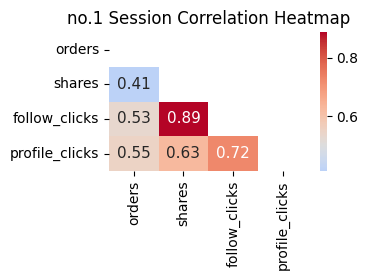

<Figure size 320x180 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'no.2 Session Correlation Heatmap')

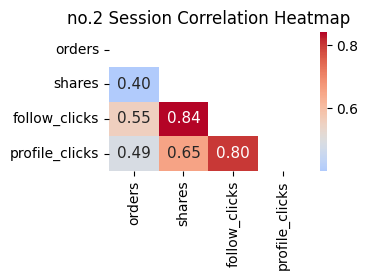

<Figure size 320x180 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'no.3 Session Correlation Heatmap')

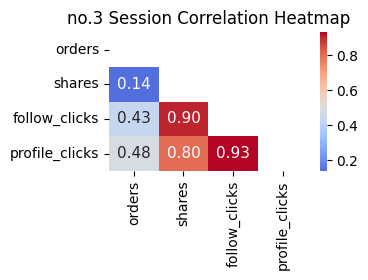

<Figure size 320x180 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'no.4 Session Correlation Heatmap')

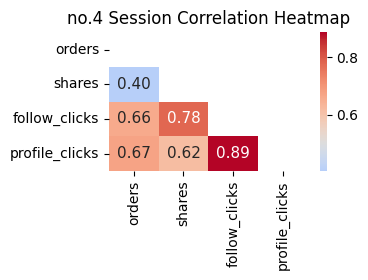

<Figure size 320x180 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'no.5 Session Correlation Heatmap')

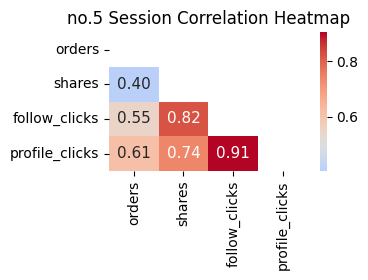

<Figure size 320x180 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'no.6 Session Correlation Heatmap')

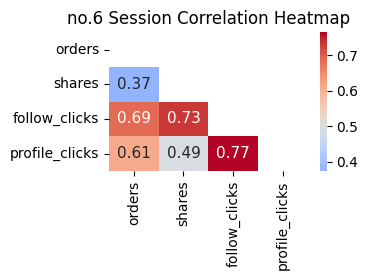

In [ ]:
for i in range(1, 7):
    temp_df = is_lc_df.loc[is_lc_df['accum_sessions'] == i]

    temp_df = temp_df.loc[(temp_df['shares'] > 0) &\
                          (temp_df['follow_clicks'] > 0) &\
                          (temp_df['profile_clicks'] > 0)]

    corr_df = temp_df[['orders',
                      # functions
                      'shares',
                      'follow_clicks',
                      'profile_clicks']]
                      #  'auction_clicks',
                      #  'coin_claim_button_total_clicks',
                      #  'coin_spend_non_carousel',
                      #  'coin_spend_carousel']]

    correlation_matrix = corr_df.corr()

    plt.figure(figsize = (3.2, 1.8))
    sns.heatmap(correlation_matrix,
                annot = True,
                cmap = 'coolwarm',
                fmt = '.2f',
                mask = np.triu(np.ones_like(correlation_matrix, dtype = bool)),
                annot_kws = {'size': 11},
                center = 0.5)

    plt.title(f'no.{i} Session Correlation Heatmap')
    plt.show()

<Figure size 320x180 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'no.1 Session Correlation Heatmap')

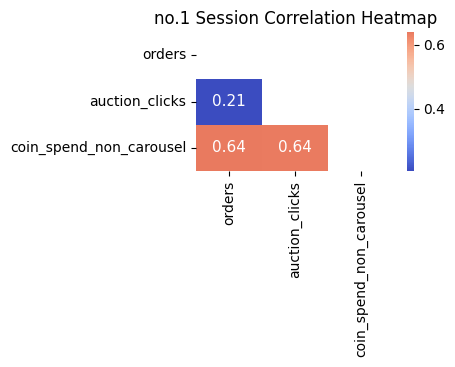

<Figure size 320x180 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'no.2 Session Correlation Heatmap')

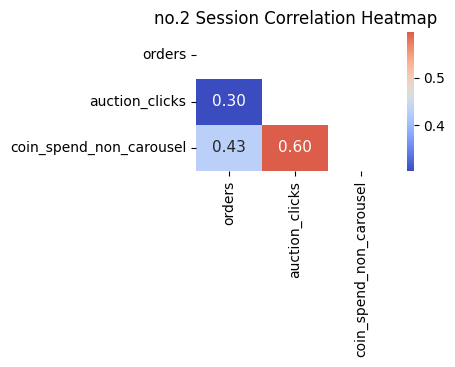

<Figure size 320x180 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'no.3 Session Correlation Heatmap')

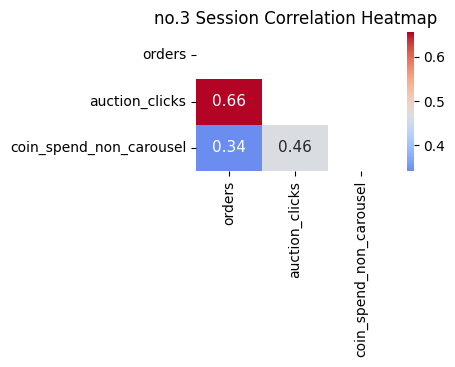

<Figure size 320x180 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'no.4 Session Correlation Heatmap')

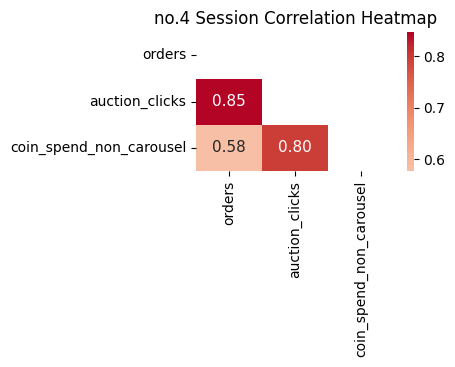

<Figure size 320x180 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'no.5 Session Correlation Heatmap')

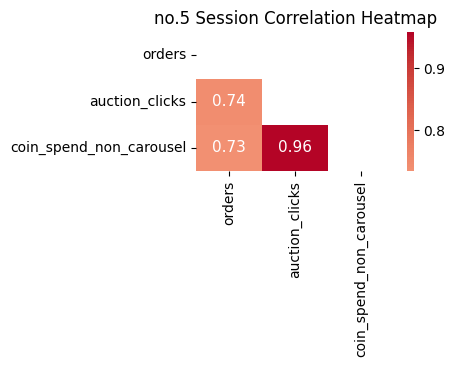

<Figure size 320x180 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'no.6 Session Correlation Heatmap')

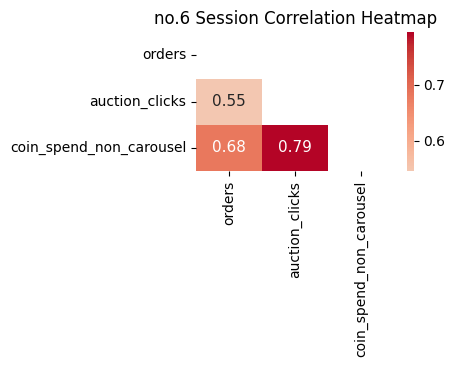

In [ ]:
for i in range(1, 7):
    temp_df = is_lc_df.loc[is_lc_df['accum_sessions'] == i]

    temp_df = temp_df.loc[(temp_df['auction_clicks'] > 0) &\
                          (temp_df['coin_spend_non_carousel'] > 0)]

    corr_df = temp_df[['orders',
                      # functions
                      # 'shares',
                      # 'follow_clicks',
                      # 'profile_clicks']]
                       'auction_clicks',
                      #  'coin_claim_button_total_clicks',
                       'coin_spend_non_carousel']]
                      #  'coin_spend_carousel']]

    correlation_matrix = corr_df.corr()

    plt.figure(figsize = (3.2, 1.8))
    sns.heatmap(correlation_matrix,
                annot = True,
                cmap = 'coolwarm',
                fmt = '.2f',
                mask = np.triu(np.ones_like(correlation_matrix, dtype = bool)),
                annot_kws = {'size': 11},
                center = 0.47)

    plt.title(f'no.{i} Session Correlation Heatmap')
    plt.show()

## **4-3. Interval Performance(Median Change)**

### 4-3-1. Stream Minute

In [ ]:
is_lc_df = is_lc_df.loc[(is_lc_df['stream_minute'] <= 240)]

is_lc_df['group'] = pd.cut(is_lc_df['stream_minute'],
                           bins = np.arange(0, is_lc_df['stream_minute'].max(), 10),
                           right = False)

fig = px.scatter(is_lc_df,
                 x='stream_minute',
                 y='viewer_cnt',
                 color='group',
                 labels={'stream_minute': 'stream_minute', 'viewer_cnt': 'viewer_cnt'})

for group_name, group_data in is_lc_df.groupby('group'):
    x = group_data['stream_minute']
    y = group_data['viewer_cnt']
    m, b = np.polyfit(x, y, 1)
    fig.add_scatter(x=x, y=m*x+b, mode='lines', name=f'Regression Line - {group_name}')

    y_pred = m*x + b
    ss_total = np.sum((y - np.mean(y))**2)
    ss_residual = np.sum((y - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)

    fig.add_annotation(x = group_data['stream_minute'].median(),
                       y = group_data['viewer_cnt'].max(),
                      #  x=group_data['stream_minute'].iloc[len(group_data) // 2],
                      #  y=group_data['viewer_cnt'].iloc[len(group_data) // 2],
                       text=f'R² = {r_squared:.4f}',
                      #  text=f'Regression Line: y = {m:.4f}x + {b:.4f}<br>R² = {r_squared:.4f}',
                       showarrow=False, bgcolor='white')

fig.show()

In [ ]:
is_lc_df['group_str'] = is_lc_df['group'].astype(str)

r_squared_values = []

for group_name, group_data in is_lc_df.groupby('group'):
    x = group_data['stream_minute']
    y = group_data['viewer_cnt']
    m, b = np.polyfit(x, y, 1)

    y_pred = m*x + b
    ss_total = np.sum((y - np.mean(y))**2)
    ss_residual = np.sum((y - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)

    r_squared_values.append({'group': str(group_name), 'r_squared': r_squared})


r_squared_df = pd.DataFrame(r_squared_values)


fig = px.line(r_squared_df,
              x = 'group',
              y = 'r_squared',
              title = 'R² Values for Each Group')
fig.update_xaxes(title = 'Group')
fig.update_yaxes(title = 'R²')


for i, row in r_squared_df.iterrows():
    fig.add_annotation(x = row['group'],
                       y = row['r_squared'],
                       text = f"{row['r_squared']:.3f}",
                       showarrow = True,
                       arrowhead = 4)

fig.show()

In [ ]:
is_lc_df['group_str'] = is_lc_df['group'].astype(str)

median_values = []

for group_name, group_data in is_lc_df.groupby('group'):
    x = group_data['stream_minute']
    y = group_data['viewer_cnt']
    m, b = np.polyfit(x, y, 1)

    median_ = y.median()

    median_values.append({'group': str(group_name), 'median_': median_})

median_values_df = pd.DataFrame(median_values)

fig = px.line(median_values_df,
              x = 'group',
              y = 'median_',
              title = 'Median Values for Each Group')
fig.update_xaxes(title = 'Group')
fig.update_yaxes(title = 'Median')

for i, row in median_values_df.iterrows():
    fig.add_annotation(x = row['group'],
                       y = row['median_'],
                       text = f"{row['median_']:.0f}",
                       showarrow = True,
                       arrowhead = 4)

fig.show()

In [ ]:
# is_lc_df['group_str'] = is_lc_df['group'].astype(str)

# mean_values = []

# for group_name, group_data in is_lc_df.groupby('group'):
#     x = group_data['stream_minute']
#     y = group_data['viewer_cnt']
#     m, b = np.polyfit(x, y, 1)

#     mean_ = y.mean()

#     mean_values.append({'group': str(group_name), 'mean_': mean_})

# mean_values_df = pd.DataFrame(mean_values)

# fig = px.line(mean_values_df,
#               x='group',
#               y='mean_',
#               title='Mean Values for Each Group')
# fig.update_xaxes(title='Group')
# fig.update_yaxes(title='Mean')

# for i, row in mean_values_df.iterrows():
#     fig.add_annotation(x=row['group'],
#                        y=row['mean_'],
#                        text=f"{row['mean_']:.3f}",
#                        showarrow=True,
#                        arrowhead=4)

# fig.show()

In [ ]:
# is_lc_df['group_str'] = is_lc_df['group'].astype(str)

# change_rates = []

# prev_mean = None

# for group_name, group_data in is_lc_df.groupby('group'):
#     x = group_data['stream_minute']
#     y = group_data['viewer_cnt']
#     m, b = np.polyfit(x, y, 1)

#     mean_ = y.mean()

#     if prev_mean is not None:
#         change_rate = (mean_ - prev_mean) / prev_mean
#         change_rates.append({'group': str(group_name), 'change_rate': change_rate})

#     prev_mean = mean_

# change_rates_df = pd.DataFrame(change_rates)

# fig = px.line(change_rates_df,
#               x = 'group',
#               y = 'change_rate',
#               title = 'Change Rates of Mean Values between Groups')

# fig.update_xaxes(title = 'Group')
# fig.update_yaxes(title = 'Change Rate')

# for i, row in change_rates_df.iterrows():
#     fig.add_annotation(x = row['group'],
#                        y = row['change_rate'],
#                        text = f"{row['change_rate']*100:.1f}%",
#                        showarrow = True,
#                        arrowhead = 4)

# fig.show()

In [ ]:
is_lc_df['group_str'] = is_lc_df['group'].astype(str)

change_rates = []

prev_median = None

for group_name, group_data in is_lc_df.groupby('group'):
    x = group_data['stream_minute']
    y = group_data['viewer_cnt']
    m, b = np.polyfit(x, y, 1)

    median_ = y.median()

    if prev_median is not None:
        change_rate = (median_ - prev_median) / prev_median
        change_rates.append({'group': str(group_name), 'change_rate': change_rate})

    prev_median = median_

change_rates_df = pd.DataFrame(change_rates)

fig = px.line(change_rates_df,
              x = 'group',
              y = 'change_rate',
              title = 'Change Rates of Median Values between Groups')

fig.update_xaxes(title = 'Group')
fig.update_yaxes(title = 'Change Rate')

for i, row in change_rates_df.iterrows():
    fig.add_annotation(x = row['group'],
                       y = row['change_rate'],
                       text = f"{row['change_rate']*100:.0f}%",
                       showarrow = True,
                       arrowhead = 4)

fig.show()

In [ ]:
is_lc_df.groupby(['group'])['ls_session_id'].count().to_frame('session_cnt').reset_index().head(9)

### 4-3-2. Discount Rate

In [ ]:
len(is_lc_df.loc[is_lc_df['discount_rate'] == 0]), \
len(is_lc_df.loc[is_lc_df['discount_rate'] != 0]), \
len(is_lc_df)

In [ ]:
np.around((len(is_lc_df.loc[(is_lc_df['orders'] > 0) & (is_lc_df['discount_rate'] == 0)]) / len(is_lc_df))*100, 2)

In [ ]:
sns.kdeplot(is_lc_df['discount_rate'])

In [ ]:
line_df = is_lc_df.loc[(is_lc_df['discount_rate'] > 0)]
line_df = line_df.loc[(line_df['discount_rate'] < 0.7)]

line_df['group'] = pd.cut(line_df['discount_rate'],
                           bins = np.arange(0, 0.7, 0.05),
                           right = False).astype(str)

fig = px.scatter(line_df,
                 x = 'discount_rate',
                 y = 'viewer_cnt',
                 color = 'group',
                 labels = {'discount_rate': 'discount_rate', 'viewer_cnt': 'viewer_cnt'})

for group_name, group_data in line_df.groupby('group'):
    x  =  group_data['discount_rate']
    y  =  group_data['viewer_cnt']
    m, b  =  np.polyfit(x, y, 1)
    fig.add_scatter(x = x, y = m*x+b, mode = 'lines', name = f'Regression Line - {group_name}')

    y_pred  =  m*x + b
    ss_total  =  np.sum((y - np.mean(y))**2)
    ss_residual  =  np.sum((y - y_pred)**2)
    r_squared  =  1 - (ss_residual / ss_total)

    fig.add_annotation(x  =  group_data['discount_rate'].median(),
                       y  =  group_data['viewer_cnt'].quantile(0.75),
                      #  x = group_data['discount_rate'].iloc[len(group_data) // 2],
                      #  y = group_data['viewer_cnt'].iloc[len(group_data) // 2],
                       text = f'R²  =  {r_squared:.4f}',
                      #  text = f'Regression Line: y  =  {m:.4f}x + {b:.4f}<br>R²  =  {r_squared:.4f}',
                       showarrow = False, bgcolor = 'white')

fig.show()

In [ ]:
# is_lc_df['group_str'] = is_lc_df['group'].astype(str)

r_squared_values = []

for group_name, group_data in line_df.groupby('group'):
    x = group_data['stream_minute']
    y = group_data['viewer_cnt']
    m, b = np.polyfit(x, y, 1)

    y_pred = m*x + b
    ss_total = np.sum((y - np.mean(y))**2)
    ss_residual = np.sum((y - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)

    r_squared_values.append({'group': str(group_name), 'r_squared': r_squared})


r_squared_df = pd.DataFrame(r_squared_values)


fig = px.line(r_squared_df,
              x = 'group',
              y = 'r_squared',
              title = 'R² Values for Each Group')

fig.update_xaxes(title = 'Group')
fig.update_yaxes(title = 'R²')


for i, row in r_squared_df.iterrows():
    fig.add_annotation(x = row['group'],
                       y = row['r_squared'],
                       text = f"{row['r_squared']:.3f}",
                       showarrow = True,
                       arrowhead = 4)

fig.show()

In [ ]:
line_df['group_str'] = line_df['group'].astype(str)

mean_values = []

for group_name, group_data in line_df.groupby('group'):
    x = group_data['stream_minute']
    y = group_data['viewer_cnt']
    m, b = np.polyfit(x, y, 1)

    mean_ = y.mean()

    mean_values.append({'group': str(group_name), 'mean_': mean_})

mean_values_df = pd.DataFrame(mean_values)

fig = px.line(mean_values_df,
              x = 'group',
              y = 'mean_',
              title = 'Mean Values for Each Group')
fig.update_xaxes(title = 'Group')
fig.update_yaxes(title = 'Mean')

for i, row in mean_values_df.iterrows():
    fig.add_annotation(x = row['group'],
                       y = row['mean_'],
                       text = f"{row['mean_']:.1f}",
                       showarrow = True,
                       arrowhead = 4)

fig.show()

In [ ]:
line_df['group_str'] = line_df['group'].astype(str)

median_values = []

for group_name, group_data in line_df.groupby('group'):
    x = group_data['stream_minute']
    y = group_data['viewer_cnt']
    m, b = np.polyfit(x, y, 1)

    median_ = y.median()

    median_values.append({'group': str(group_name), 'median_': median_})

median_values_df = pd.DataFrame(median_values)

fig = px.line(median_values_df,
              x = 'group',
              y = 'median_',
              title = 'Median Values for Each Group')
fig.update_xaxes(title = 'Group')
fig.update_yaxes(title = 'Median')

for i, row in median_values_df.iterrows():
    fig.add_annotation(x = row['group'],
                       y = row['median_'],
                       text = f"{row['median_']:.0f}",
                       showarrow = True,
                       arrowhead = 4)

fig.show()

In [ ]:
line_df['group_str'] = line_df['group'].astype(str)

change_rates = []

prev_mean = None

for group_name, group_data in line_df.groupby('group'):
    x = group_data['stream_minute']
    y = group_data['viewer_cnt']
    m, b = np.polyfit(x, y, 1)

    mean_ = y.mean()

    if prev_mean is not None:
        change_rate = (mean_ - prev_mean) / prev_mean
        change_rates.append({'group': str(group_name), 'change_rate': change_rate})

    prev_mean = mean_

change_rates_df = pd.DataFrame(change_rates)

fig = px.line(change_rates_df,
              x = 'group',
              y = 'change_rate',
              title = 'Change Rates of Mean Values between Groups')

fig.update_xaxes(title = 'Group')
fig.update_yaxes(title = 'Change Rate')

for i, row in change_rates_df.iterrows():
    fig.add_annotation(x = row['group'],
                       y = row['change_rate'],
                       text = f"{row['change_rate']*100:.0f}%",
                       showarrow = True,
                       arrowhead = 4)

fig.show()

In [ ]:
line_df['group_str'] = line_df['group'].astype(str)

change_rates = []

prev_median = None

for group_name, group_data in line_df.groupby('group'):
    x = group_data['stream_minute']
    y = group_data['viewer_cnt']
    m, b = np.polyfit(x, y, 1)

    median_ = y.median()

    if prev_median is not None:
        change_rate = (median_ - prev_median) / prev_median
        change_rates.append({'group': str(group_name), 'change_rate': change_rate})

    prev_median = median_

change_rates_df = pd.DataFrame(change_rates)

fig = px.line(change_rates_df,
              x = 'group',
              y = 'change_rate',
              title = 'Change Rates of Median Values between Groups')

fig.update_xaxes(title = 'Group')
fig.update_yaxes(title = 'Change Rate')

for i, row in change_rates_df.iterrows():
    fig.add_annotation(x = row['group'],
                       y = row['change_rate'],
                       text = f"{row['change_rate']*100:.0f}%",
                       showarrow = True,
                       arrowhead = 4)

fig.show()

In [ ]:
line_df.groupby(['group'])['ls_session_id'].count().to_frame('session_cnt').reset_index()

## 4-4. Viewer count groupby Time Sections

In [ ]:
q1 = bs_drop['viewer_cnt'].quantile(0.25)
q3 = bs_drop['viewer_cnt'].quantile(0.75)

boxplot_df = bs_drop.loc[bs_drop['viewer_cnt'] < 1.5*(q3-q1)]

fig = px.box(boxplot_df,
             x = 'week_day',
             y = 'viewer_cnt',
             title = 'Boxplot of Viewer Count by Weekday',
             labels = {'week_day': 'Weekday', 'viewer_cnt': 'Viewer Count'})
fig.show()

In [ ]:
bs_drop.pivot_table(index = 'grass_hour',
                    columns = 'week_day_str',
                    values = 'viewer_cnt',
                    aggfunc = 'sum',
                    margins = True)

In [ ]:
cat_filter = ["Women Accessories", "Women's Apparel", "Life & Entertainment", "Home & Living"]
week_day_filter = [7]
grass_hour_filter = [0, 1, 2]

h_bar_df = bs_drop.loc[bs_drop['shop_category'].isin(cat_filter) & \
                       bs_drop['week_day'].isin(week_day_filter) & \
                       bs_drop['grass_hour'].isin(grass_hour_filter)][['grass_month',
                                                                       'week_day',
                                                                       'grass_hour',
                                                                       'shop_category',
                                                                       'streamer_id']].reset_index(drop = True)

# h_bar_df = is_lc_df.loc[is_lc_df['week_day'].isin(week_day_filter) & \
#                       is_lc_df['grass_hour'].isin(grass_hour_filter)][['grass_month',
#                                                                        'week_day',
#                                                                        'grass_hour',
#                                                                        'shop_category',
#                                                                        'streamer_id']].reset_index(drop = True)

h_bar_plot = h_bar_df.groupby('shop_category')['streamer_id'].count().to_frame('count').reset_index()
h_bar_plot

In [ ]:
InteractiveShell.ast_node_interactivity = 'last'

In [ ]:
total_count = h_bar_plot['count'].sum()
h_bar_plot['percentage'] = (h_bar_plot['count'] / total_count) * 100

# h_bar_plot = h_bar_plot.sort_values('percentage', ascending = False).head(5).reset_index()

color_palette = px.colors.qualitative.Set1

fig = go.Figure(data = [go.Bar(
    y = h_bar_plot['shop_category'],
    x = h_bar_plot['percentage'],
    orientation = 'h',
    marker = dict(color = color_palette),
    text = h_bar_plot['percentage'].round(1).astype(str) + '%',
    textposition = 'auto'
)])

fig.update_layout(title = 'Analyzed Streamers Pool',
                  xaxis_title = 'LS Session Count(%)',
                  yaxis_title = 'Shop Category',
                  showlegend = False,
                  width = 512,
                  height = 384)

fig.show()

# **5. Data Modeling**

## **5-0. Ensuring the Skewness**

In [ ]:
InteractiveShell.ast_node_interactivity = 'last'

In [ ]:
for i in ['viewer_cnt', 'stream_minute', 'discount_rate', 'gmv', 'orders']:
    quantiles = stats.probplot(is_lc_df[i],
                               dist = 'norm')

    theoretical_quantiles = quantiles[0][0]
    observed_quantiles = quantiles[0][1]

    fig = go.Figure(data = go.Scatter(x = theoretical_quantiles,
                                      y = observed_quantiles,
                                      mode = 'markers',
                                      marker = dict(color = 'blue')))

    x_line = np.linspace(np.min(theoretical_quantiles), np.max(theoretical_quantiles), 10)
    y_line = np.linspace(np.min(observed_quantiles), np.max(observed_quantiles), 10)

    fig.add_trace(go.Scatter(x = x_line, y = y_line, mode = 'lines', name = 'Diagonal'))
    fig.update_layout(title = f'Q-Q Plot of {i}',
                      xaxis_title = 'Theoretical Quantiles',
                      yaxis_title = 'Observed Quantiles')

    fig.show()

## **5-1. Random Forest**

In [ ]:
%%time

for i in range(1, 7):
    temp_df = is_lc_df.loc[is_lc_df['accum_sessions'] == i]

    temp_df = temp_df.loc[(temp_df['shares'] > 0) &\
                          (temp_df['follow_clicks'] > 0) &\
                          (temp_df['profile_clicks'] > 0)]

    x = temp_df[['shares',
                'follow_clicks',
                'profile_clicks']]

    y = temp_df['viewer_cnt']

    x_train, x_test, y_train, y_test = train_test_split(x,
                                                        y,
                                                        test_size = 0.2,
                                                        random_state = 42)

    # Initialize RandomForestRegressor model
    rf_regressor = RandomForestRegressor(n_estimators = 100,
                                        random_state = 42)  # can adjust the number of trees (n_estimators) as needed

    # Train the model
    tqdm.write("Training the model...")
    for _ in tqdm(range(10)):
        rf_regressor.fit(x_train, y_train)

    # Predict on the test set
    tqdm.write("Making predictions...")
    y_pred = rf_regressor.predict(x_test)

    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    # Display feature importance
    feature_importances = rf_regressor.feature_importances_
    feature_names = x.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names,
                                          'Importance': feature_importances})

    feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

    # Visualize feature importance
    fig = px.bar(feature_importance_df,
                x = 'Importance',
                y = 'Feature',
                orientation = 'h',
                text = feature_importance_df['Importance'].round(2),
                labels = {'Importance': 'Importance', 'Feature': 'Feature'},
                title = f'no.{i} Session Feature Importance in Random Forest Regressor on Predicting viewer_cnt')

    fig.show()

Training the model...


100%|██████████| 10/10 [00:01<00:00,  6.09it/s]


Making predictions...
Mean Squared Error: 5105627.286162893


Training the model...


100%|██████████| 10/10 [00:01<00:00,  5.96it/s]


Making predictions...
Mean Squared Error: 17784264.252148576


Training the model...


100%|██████████| 10/10 [00:02<00:00,  4.09it/s]

Making predictions...
Mean Squared Error: 9663921.533746878


Training the model...


100%|██████████| 10/10 [00:02<00:00,  4.19it/s]


Making predictions...
Mean Squared Error: 4018179.8242937946


Training the model...


100%|██████████| 10/10 [00:01<00:00,  6.20it/s]


Making predictions...
Mean Squared Error: 14231125.242307756


Training the model...


100%|██████████| 10/10 [00:01<00:00,  6.03it/s]


Making predictions...
Mean Squared Error: 7352697.085751761


CPU times: user 11.7 s, sys: 36.1 ms, total: 11.8 s
Wall time: 12 s


In [ ]:
%%time

for i in range(1, 7):
    temp_df = is_lc_df.loc[is_lc_df['accum_sessions'] == i]

    temp_df = temp_df.loc[(temp_df['shares'] > 0) &\
                          (temp_df['follow_clicks'] > 0) &\
                          (temp_df['profile_clicks'] > 0) &\
                          (temp_df['auction_clicks'] > 0) &\
                          (temp_df['coin_spend_non_carousel'] > 0)]

    x = temp_df[['shares',
                 'follow_clicks',
                 'profile_clicks',
                 'auction_clicks',
                 'coin_spend_non_carousel']]

    y = temp_df['viewer_cnt']

    x_train, x_test, y_train, y_test = train_test_split(x,
                                                        y,
                                                        test_size = 0.2,
                                                        random_state = 42)

    # Initialize RandomForestRegressor model
    rf_regressor = RandomForestRegressor(n_estimators = 100,
                                        random_state = 42)  # can adjust the number of trees (n_estimators) as needed

    # Train the model
    tqdm.write("Training the model...")
    for _ in tqdm(range(10)):
        rf_regressor.fit(x_train, y_train)

    # Predict on the test set
    tqdm.write("Making predictions...")
    y_pred = rf_regressor.predict(x_test)

    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error:", mse)

    # Display feature importance
    feature_importances = rf_regressor.feature_importances_
    feature_names = x.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names,
                                          'Importance': feature_importances})

    feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

    # Visualize feature importance
    fig = px.bar(feature_importance_df,
                x = 'Importance',
                y = 'Feature',
                orientation = 'h',
                text = feature_importance_df['Importance'].round(2),
                labels = {'Importance': 'Importance', 'Feature': 'Feature'},
                title = f'no.{i} Session Feature Importance in Random Forest Regressor on Predicting viewer_cnt')

    fig.show()

Training the model...


100%|██████████| 10/10 [00:04<00:00,  2.48it/s]

Making predictions...
Mean Squared Error: 12736734.207580002


Training the model...


100%|██████████| 10/10 [00:02<00:00,  3.80it/s]


Making predictions...
Mean Squared Error: 6321809.5959


Training the model...


100%|██████████| 10/10 [00:03<00:00,  2.52it/s]

Making predictions...
Mean Squared Error: 9567731.000907693


Training the model...


100%|██████████| 10/10 [00:02<00:00,  3.84it/s]

Making predictions...
Mean Squared Error: 10249122.156616665


Training the model...


100%|██████████| 10/10 [00:02<00:00,  4.07it/s]

Making predictions...
Mean Squared Error: 4123344.021742858


Training the model...


100%|██████████| 10/10 [00:01<00:00,  6.31it/s]


Making predictions...
Mean Squared Error: 13574659.625707138


CPU times: user 14.7 s, sys: 46.5 ms, total: 14.7 s
Wall time: 18.3 s


In [ ]:
%%time
x = is_lc_df[['orders_per_buyer',
              'conversion_rate',
              'viewer_cnt',
              'stream_minute',
              'like_viewer',
              'likes',
              'comment_viewer',
              'comments',
              'share_viewer',
              'shares',
              'follow_click_viewer',
              'follow_clicks',
              'item_click_viewer',
              'item_clicks',
              'profile_click_viewer',
              'profile_clicks',
              'accum_sessions',
              'coin_spend_non_carousel',
              'coin_spend_carousel',
              'cv_reward',
              'dv_reward',
              'fsv_reward']]

y = is_lc_df['cum_orders_per_accum_session']

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Initialize RandomForestRegressor model
rf_regressor = RandomForestRegressor(n_estimators = 100,
                                     random_state = 42)  # can adjust the number of trees (n_estimators) as needed

# Train the model
tqdm.write("Training the model...")
for _ in tqdm(range(10)):
    rf_regressor.fit(x_train, y_train)

# Predict on the test set
tqdm.write("Making predictions...")
y_pred = rf_regressor.predict(x_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Display feature importance
feature_importances = rf_regressor.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names,
                                      'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

# Visualize feature importance
fig = px.bar(feature_importance_df,
             x = 'Importance',
             y = 'Feature',
             orientation = 'h',
             labels = {'Importance': 'Importance', 'Feature': 'Feature'},
             title = 'Feature Importance in Random Forest Regressor on Predicting cum_orders_per_accum_session')

fig.show()

Training the model...


100%|██████████| 10/10 [00:35<00:00,  3.55s/it]

Making predictions...
Mean Squared Error: 13.671414058933312


CPU times: user 34.6 s, sys: 45.5 ms, total: 34.6 s
Wall time: 35.6 s


In [ ]:
feature_importance_df

,Feature,Importance
4,buyer_cnt,0.837286
13,item_click_viewer,0.035900
14,item_clicks,0.028087
22,fsv_reward,0.016434
2,viewer_cnt,0.009513
3,stream_minute,0.007780
7,comment_viewer,0.007339
1,conversion_rate,0.007203
8,comments,0.005705
17,accum_sessions,0.005152


## **5-2. Linear Regression**

In [ ]:
X = is_lc_df[['shares',
              'follow_clicks',
              'profile_clicks',
              'auction_clicks',
              'coin_spend_non_carousel',
              'discount_rate',
              'stream_minute']]

y = is_lc_df['viewer_cnt']

best_r2 = 0
best_train_r2 = 0
best_test_r2 = 0
best_train_size = 0

for train_size in tqdm(range(1, len(X))):
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        train_size = train_size / len(X),
                                                        random_state = 42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    if test_r2 > best_r2:
        best_r2 = test_r2
        best_train_r2 = train_r2
        best_test_r2 = test_r2
        best_train_size = train_size / len(X)
        best_model = model

coefficients = best_model.coef_
constant = best_model.intercept_

equation = '𝑦 = '
for i, coef in enumerate(coefficients):
    equation += '{} * 𝑥{} + '.format(coef.round(2), i + 1)

equation += str(constant.round(2))

print('Best R^2:', best_r2)
print('Corresponding train R^2:', best_train_r2)
print('Corresponding test R^2:', best_test_r2)
print('Best train size:', best_train_size)
print('Equation:', equation)

  0%|          | 0/6209 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

100%|█████████▉| 6206/6209 [03:07<00:00, 37.63it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

100%|██████████| 6209/6209 [03:08<00:00, 33.02it/s]

Best R^2: 0.8028452915138422
Corresponding train R^2: 0.7162540968320688
Corresponding test R^2: 0.8028452915138422
Best train size: 0.9946859903381643
Equation: 𝑦 = -19.23 * 𝑥1 + 5.92 * 𝑥2 + 10.9 * 𝑥3 + -1.02 * 𝑥4 + 0.46 * 𝑥5 + 2370.32 * 𝑥6 + 1.7 * 𝑥7 + 223.31


In [ ]:
# InteractiveShell.ast_node_interactivity = 'last'

In [ ]:
# sample_df = no_lc_df.sample(len(is_lc_df))

# X = sample_df[['coin_spend_non_carousel',
#         'coin_spend_carousel',
#         'cv_reward',
#         'dv_reward',
#         'fsv_reward']]

# y = sample_df['cum_orders_per_accum_session']

# best_r2 = 0
# best_train_r2 = 0
# best_test_r2 = 0
# best_train_size = 0

# for train_size in tqdm(range(1, len(X))):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size / len(X), random_state=42)
#     model = LinearRegression()
#     model.fit(X_train, y_train)
#     y_train_pred = model.predict(X_train)
#     y_test_pred = model.predict(X_test)
#     train_r2 = r2_score(y_train, y_train_pred)
#     test_r2 = r2_score(y_test, y_test_pred)
#     if test_r2 > best_r2:
#         best_r2 = test_r2
#         best_train_r2 = train_r2
#         best_test_r2 = test_r2
#         best_train_size = train_size / len(X)
#         best_model = model

# coefficients = best_model.coef_
# constant = best_model.intercept_

# equation = 'y = '
# for i, coef in enumerate(coefficients):
#     equation += '{}x{} + '.format(coef, i + 1)
# equation += str(constant)

# print('Best R^2:', best_r2)
# print('Corresponding train R^2:', best_train_r2)
# print('Corresponding test R^2:', best_test_r2)
# print('Best train size:', best_train_size)
# print('Equation:', equation)

  0%|          | 0/3899 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

100%|█████████▉| 3895/3899 [01:07<00:00, 45.29it/s]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

100%|██████████| 3899/3899 [01:07<00:00, 57.92it/s]

Best R^2: 0.9267319596654011
Corresponding train R^2: 0.29654685609163667
Corresponding test R^2: 0.9267319596654011
Best train size: 0.9912820512820513
Equation: y = 1.4178253628979295e-05x1 + -2.4800165520369817e-05x2 + 0.001047438704171688x3 + -0.00018128565519570582x4 + 0.0031469951244823646x5 + 1.2462313945102519


## 5-3. PCA

In [ ]:
X = is_lc_df[['stream_minute', 'orders', 'viewer_cnt', 'conversion_rate', 'orders_per_buyer']].values

PCA(n_components=2)

<Figure size 800x600 with 0 Axes>

<Axes: xlabel='PC1', ylabel='PC2'>

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

Text(0.5, 1.0, 'PCA Visualization')

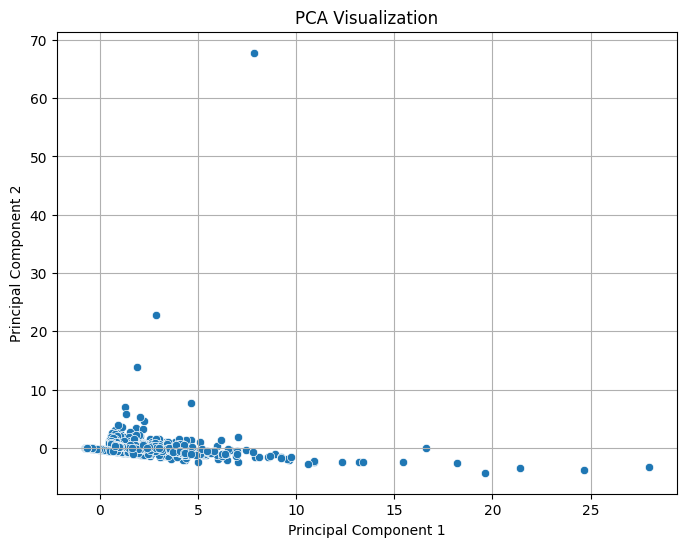

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components = 2)

pca.fit(X_scaled)

principal_components = pca.components_

X_pca = pca.transform(X_scaled)

df_pca = pd.DataFrame(data = X_pca,
                      columns=['PC1', 'PC2'])

plt.figure(figsize = (8, 6))
sns.scatterplot(data = df_pca,
                x = 'PC1',
                y = 'PC2')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.grid(True)
plt.show()

In [ ]:
X_pca

array([[-9.97408586e-01, -2.40198675e-01],
       [-1.00281548e+00, -2.43480857e-01],
       [-1.00308107e+00, -2.43215268e-01],
       ...,
       [-7.33208374e-01, -4.32632656e-04],
       [-6.93766599e-01,  2.09491050e-02],
       [-1.46516730e-01,  2.38337691e-01]])

In [ ]:
class DimensionReduction(object):
    def __init__(self): pass

    def PCA(self,data):
        Sigma=DimensionReduction.__get_CovarianceMatrix(data)
        RotMatrix, coe_PC, U=np.linalg.svd(Sigma)
        xRot = np.dot(RotMatrix,np.transpose(data))
        xRot = np.transpose(xRot)
        return coe_PC, xRot

    def PCA_Whitening(self,data):
        Sigma=DimensionReduction.__get_CovarianceMatrix(data)
        RotMatrix, coe_PC, U=np.linalg.svd(Sigma)

        epsilon=10**(-5);
        tmp=np.diag(1/np.sqrt(coe_PC+epsilon))
        xPCAwhite = np.dot(tmp,np.dot(RotMatrix,np.transpose(data)))
        xPCAwhite = np.transpose(xPCAwhite)
        return coe_PC, xPCAwhite

    def ZCA_Whitening(self,data):
        Sigma=DimensionReduction.__get_CovarianceMatrix(data)
        RotMatrix, coe_PC, U=np.linalg.svd(Sigma)

        epsilon=10**(-5);
        tmp=np.diag(1/np.sqrt(coe_PC+epsilon))
        xZCAwhite = np.dot(RotMatrix,np.dot(tmp,np.dot(RotMatrix,np.transpose(data))))
        xZCAwhite = np.transpose(xZCAwhite)
        return coe_PC, xZCAwhite




    def DAFE(self,data,label):
        dim=np.size(data,1)
        TL=(np.unique(label))
        nc=len(TL)
        Sigma_data = np.zeros([dim*nc,dim])
        Mu_data=np.zeros([nc,dim])
        Sw = np.zeros([dim,dim])
        c=0;
        for i in TL:
            c+=1;
            pos=np.where(label==i)
            pos=pos[0]
            tmp=data[pos,:]
            cindex=range((c-1)*dim, c*dim )
            Sigma_data[cindex,:]=np.cov(np.transpose(tmp))
            Sw+=Sigma_data[cindex,:];
            Mu_data[c-1,:]=np.average(tmp,axis=0)

        Sw = Sw / nc;
        Sw = 0.5 * Sw + 0.5 * np.diag(np.diag(Sw)); # regualrization for within-class scatter matrix
        Sb = np.cov(np.transpose(Mu_data))*(nc-1)/nc; # between-calss scatter matrix

        C=np.dot(np.linalg.pinv(Sw),Sb)

        DAFE_vect, DAFE_val, U=np.linalg.svd(C)
        xRot = np.dot(DAFE_vect,np.transpose(data))
        xRot = np.transpose(xRot)
        return DAFE_vect, xRot

    def __get_ZeroMean(data):
        N=np.size(data,0)
        avg=np.average(data)
        data=data-matlib.repmat(avg, N, 1);
        return data

    def __get_CovarianceMatrix(data):
        N=np.size(data,0)
        x=DimensionReduction.__get_ZeroMean(data)
        Sigma=np.dot(np.transpose(x),x)/N
        return Sigma